##**Project Assignment**

### Data Collection

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv('/content/Statewise Consumption.csv')

In [ ]:
df1

States Regions   latitude  longitude                Dates  Usage
0         Punjab      NR  31.519974  75.980003  02/01/2019 00:00:00  119.9
1        Haryana      NR  28.450006  77.019991  02/01/2019 00:00:00  130.3
2      Rajasthan      NR  26.449999  74.639981  02/01/2019 00:00:00  234.1
3          Delhi      NR  28.669993  77.230004  02/01/2019 00:00:00   85.8
4             UP      NR  27.599981  78.050006  02/01/2019 00:00:00  313.9
...          ...     ...        ...        ...                  ...    ...
16594    Manipur     NER  24.799971  93.950017  05/12/2020 00:00:00    2.5
16595  Meghalaya     NER  25.570492  91.880014  05/12/2020 00:00:00    5.8
16596    Mizoram     NER  23.710399  92.720015  05/12/2020 00:00:00    1.6
16597   Nagaland     NER  25.666998  94.116570  05/12/2020 00:00:00    2.1
16598    Tripura     NER  23.835404  91.279999  05/12/2020 00:00:00    3.3

[16599 rows x 6 columns]

### Data Preprocessing

In [ ]:
df1.isna().sum()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [ ]:
duplicates = df1[df1.duplicated()]
duplicates

States Regions   latitude  longitude                Dates  \
6065  Arunachal Pradesh     NER  27.100399  93.616601  08/07/2019 00:00:00   
6135            Mizoram     NER  23.710399  92.720015  09/07/2019 00:00:00   
6196             Sikkim      ER  27.333330  88.616647  10/07/2019 00:00:00   
6200          Meghalaya     NER  25.570492  91.880014  10/07/2019 00:00:00   
6201            Mizoram     NER  23.710399  92.720015  10/07/2019 00:00:00   
6202           Nagaland     NER  25.666998  94.116570  10/07/2019 00:00:00   
6203            Tripura     NER  23.835404  91.279999  10/07/2019 00:00:00   
6308        Uttarakhand      NR  30.320409  78.050006  12/07/2019 00:00:00   
6323              Pondy      SR  11.934994  79.830000  12/07/2019 00:00:00   
6329  Arunachal Pradesh     NER  27.100399  93.616601  12/07/2019 00:00:00   
6334           Nagaland     NER  25.666998  94.116570  12/07/2019 00:00:00   
6335            Tripura     NER  23.835404  91.279999  12/07/2019 00:00:00   

      Usage  
6065    1.4  
6135    1.4  
6196    1.5  
6200    4.1  
6201    1.4  
6202    1.8  
6203    2.9  
6308   34.1  
6323    7.4  
6329    2.1  
6334    2.1  
6335    3.5

In [ ]:
df1 = df1.drop_duplicates()

### Feature Engineering

In [ ]:
df1['Dates'] = pd.to_datetime(df1['Dates'], format="%d/%m/%Y %H:%M:%S")

df1['Year'] = df1['Dates'].dt.year
df1['Month'] = df1['Dates'].dt.month
df1['Quarter'] = df1['Dates'].dt.quarter


day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df1['Day of the Week'] = df1['Dates'].dt.dayofweek.map(day_names)

In [ ]:
# Categorize seasons as 'Summer', 'Winter', and 'Rainy' based on the month
def categorize_season(month):
    if month in [3, 4, 5,6]:  # March, April, May,June
        return 'Summer'
    elif month in [7, 8,9]:  #  July, August,September
        return 'Rainy'
    elif month in [10, 11]:  # October, November
        return 'Winter'
    else:  # December, January, February
        return 'Winter'

df1['Season'] = df1['Month'].apply(categorize_season)

In [ ]:
df1

States Regions   latitude  longitude      Dates  Usage  Year  Month  \
0         Punjab      NR  31.519974  75.980003 2019-01-02  119.9  2019      1   
1        Haryana      NR  28.450006  77.019991 2019-01-02  130.3  2019      1   
2      Rajasthan      NR  26.449999  74.639981 2019-01-02  234.1  2019      1   
3          Delhi      NR  28.669993  77.230004 2019-01-02   85.8  2019      1   
4             UP      NR  27.599981  78.050006 2019-01-02  313.9  2019      1   
...          ...     ...        ...        ...        ...    ...   ...    ...   
16594    Manipur     NER  24.799971  93.950017 2020-12-05    2.5  2020     12   
16595  Meghalaya     NER  25.570492  91.880014 2020-12-05    5.8  2020     12   
16596    Mizoram     NER  23.710399  92.720015 2020-12-05    1.6  2020     12   
16597   Nagaland     NER  25.666998  94.116570 2020-12-05    2.1  2020     12   
16598    Tripura     NER  23.835404  91.279999 2020-12-05    3.3  2020     12   

       Quarter Day of the Week  Season  
0            1       Wednesday  Winter  
1            1       Wednesday  Winter  
2            1       Wednesday  Winter  
3            1       Wednesday  Winter  
4            1       Wednesday  Winter  
...        ...             ...     ...  
16594        4        Saturday  Winter  
16595        4        Saturday  Winter  
16596        4        Saturday  Winter  
16597        4        Saturday  Winter  
16598        4        Saturday  Winter  

[16587 rows x 11 columns]

In [ ]:
df1 = pd.get_dummies(df1, columns=['Regions'])

In [ ]:
df1.head()

States   latitude  longitude      Dates  Usage  Year  Month  Quarter  \
0     Punjab  31.519974  75.980003 2019-01-02  119.9  2019      1        1   
1    Haryana  28.450006  77.019991 2019-01-02  130.3  2019      1        1   
2  Rajasthan  26.449999  74.639981 2019-01-02  234.1  2019      1        1   
3      Delhi  28.669993  77.230004 2019-01-02   85.8  2019      1        1   
4         UP  27.599981  78.050006 2019-01-02  313.9  2019      1        1   

  Day of the Week  Season  Regions_ER  Regions_NER  Regions_NR  Regions_SR  \
0       Wednesday  Winter       False        False        True       False   
1       Wednesday  Winter       False        False        True       False   
2       Wednesday  Winter       False        False        True       False   
3       Wednesday  Winter       False        False        True       False   
4       Wednesday  Winter       False        False        True       False   

   Regions_WR  
0       False  
1       False  
2       False  
3       False  
4       False

### EDA

Distribution of usage over time for the entire country

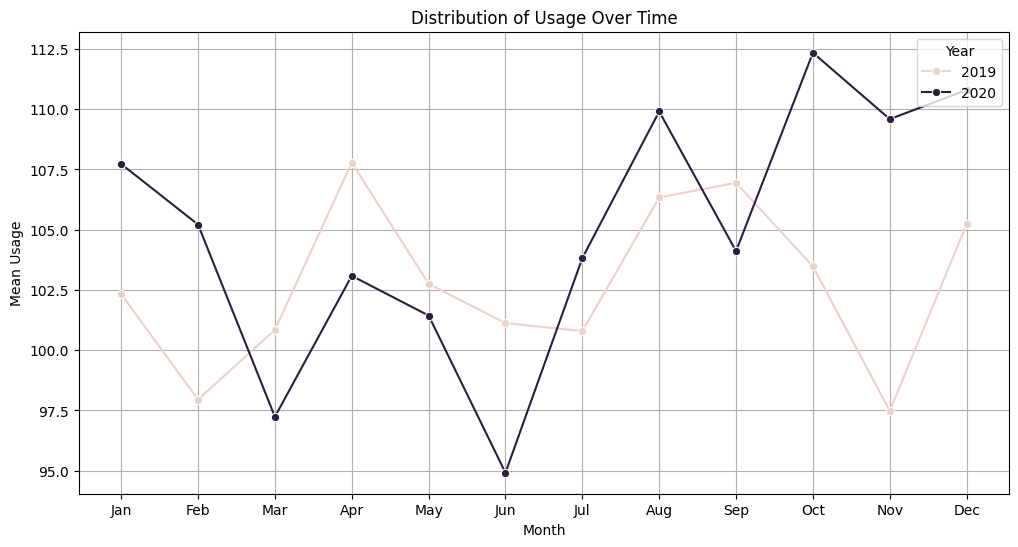

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

usage_by_month = df1.groupby(['Year', 'Month'])['Usage'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=usage_by_month, x='Month', y='Usage', hue='Year', marker='o')
plt.title('Distribution of Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Mean Usage')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()

*October month has highest usage*

In [ ]:
average_monthly_usage_state = df1.groupby(['States','Year','Month'])['Usage'].mean().reset_index()
average_quarterly_usage_state = df1.groupby(['States','Year','Month','Quarter'])['Usage'].mean().reset_index()
average_yearly_usage_state = df1.groupby(['States','Year'])['Usage'].mean().reset_index()

In [ ]:
print("Average Monthly Usage for Each State:")
average_monthly_usage_state

Average Monthly Usage for Each State:


States  Year  Month       Usage
0    Andhra Pradesh  2019      1  168.520000
1    Andhra Pradesh  2019      2  167.566667
2    Andhra Pradesh  2019      3  174.460000
3    Andhra Pradesh  2019      4  188.268966
4    Andhra Pradesh  2019      5  168.410000
..              ...   ...    ...         ...
787     West Bengal  2020      8  156.840000
788     West Bengal  2020      9  113.220000
789     West Bengal  2020     10  155.620000
790     West Bengal  2020     11  159.820000
791     West Bengal  2020     12  154.540000

[792 rows x 4 columns]

In [ ]:
print("\nAverage Yearly Usage for Each State:")
average_yearly_usage_state


Average Yearly Usage for Each State:


States  Year       Usage
0      Andhra Pradesh  2019  175.757660
1      Andhra Pradesh  2020  177.134722
2   Arunachal Pradesh  2019    2.102241
3   Arunachal Pradesh  2020    2.131250
4               Assam  2019   25.012256
..                ...   ...         ...
61                 UP  2020  314.377778
62        Uttarakhand  2019   35.934358
63        Uttarakhand  2020   36.725000
64        West Bengal  2019  138.910028
65        West Bengal  2020  138.204861

[66 rows x 3 columns]

In [ ]:
print("\nAverage Quarterly Usage for Each State:")
average_quarterly_usage_state


Average Quarterly Usage for Each State:


States  Year  Month  Quarter       Usage
0    Andhra Pradesh  2019      1        1  168.520000
1    Andhra Pradesh  2019      2        1  167.566667
2    Andhra Pradesh  2019      3        1  174.460000
3    Andhra Pradesh  2019      4        2  188.268966
4    Andhra Pradesh  2019      5        2  168.410000
..              ...   ...    ...      ...         ...
787     West Bengal  2020      8        3  156.840000
788     West Bengal  2020      9        3  113.220000
789     West Bengal  2020     10        4  155.620000
790     West Bengal  2020     11        4  159.820000
791     West Bengal  2020     12        4  154.540000

[792 rows x 5 columns]

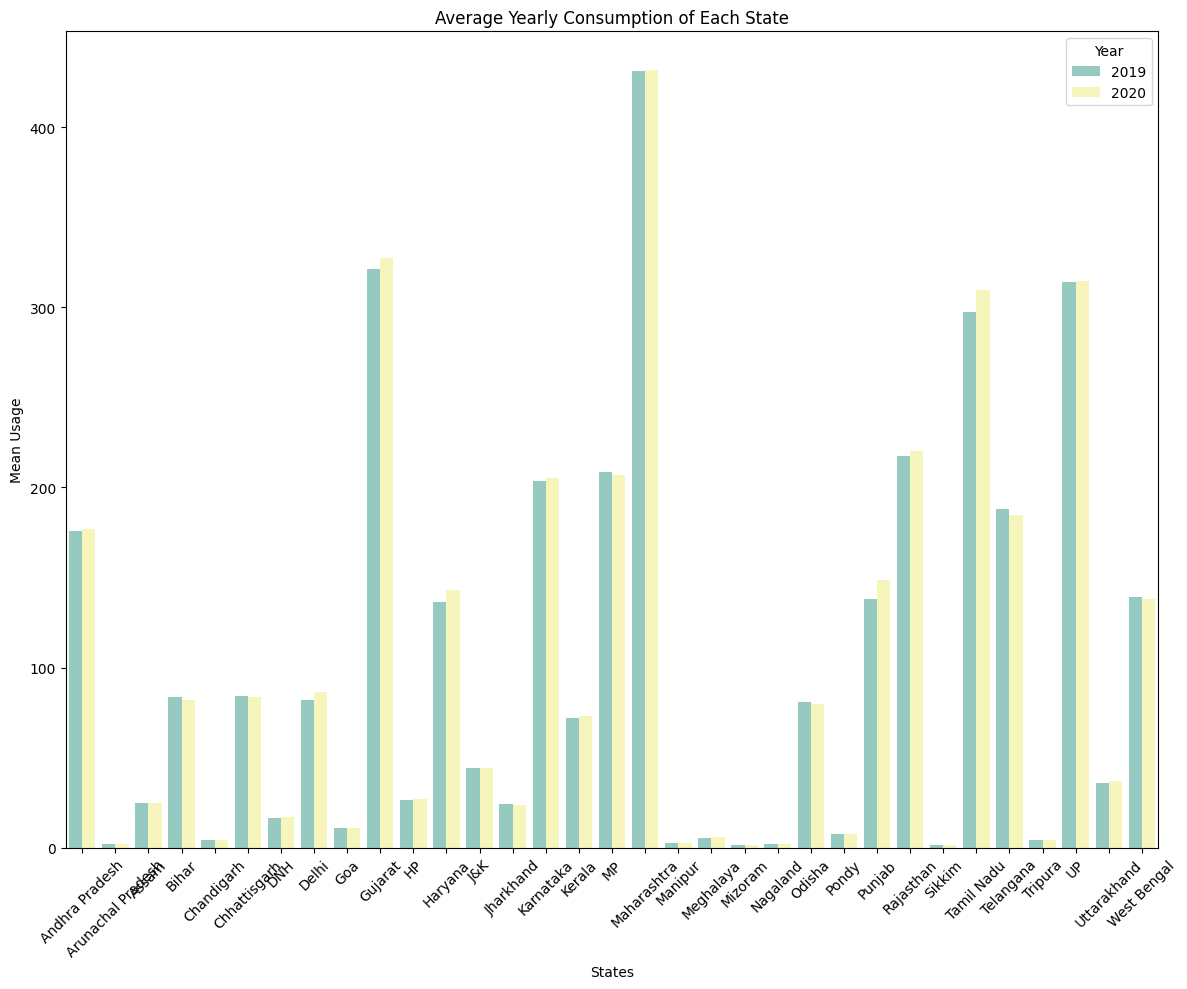

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 10))

# Plot yearly consumption for each State
sns.barplot(data=average_yearly_usage_state, x='States', y='Usage', hue='Year', palette='Set3', ax=axes)
axes.set_title('Average Yearly Consumption of Each State')
axes.set_xlabel('States')
axes.set_ylabel('Mean Usage')

# Rotate x-axis labels for better readability
axes.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


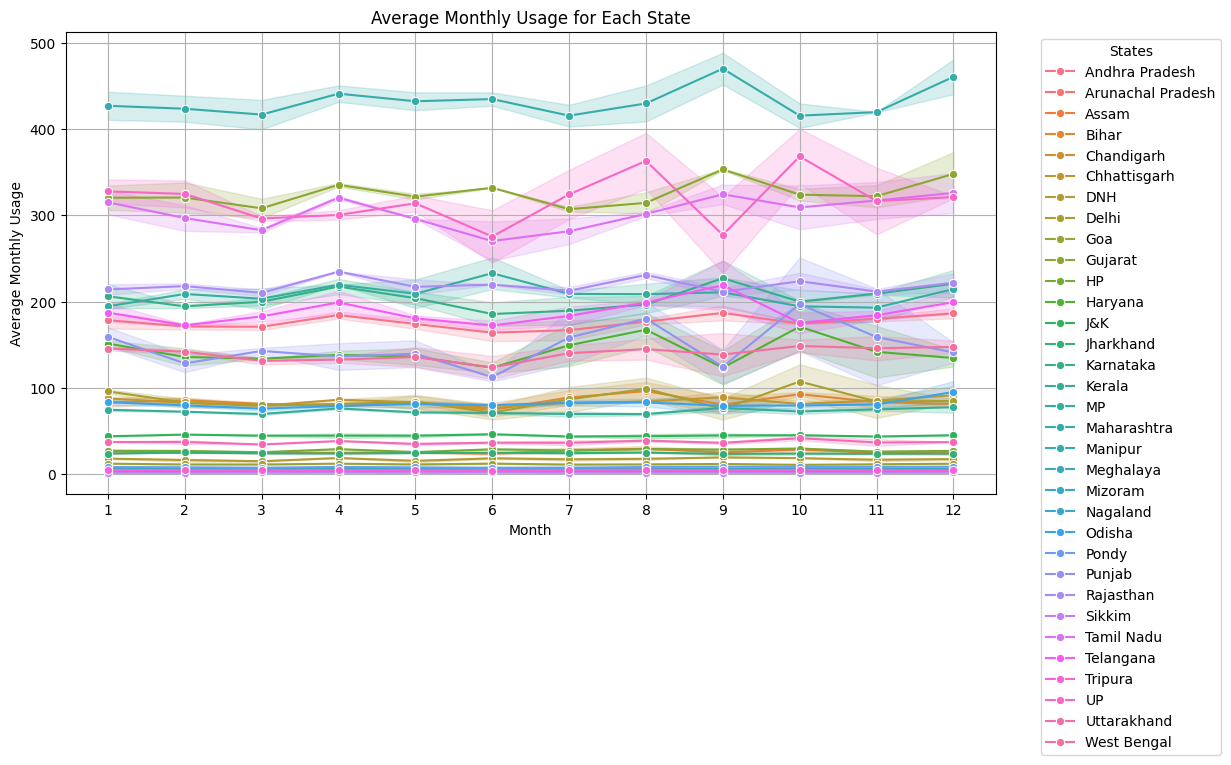

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_monthly_usage_state, x='Month', y='Usage', hue='States', marker='o')
plt.title('Average Monthly Usage for Each State')
plt.xlabel('Month')
plt.ylabel('Average Monthly Usage')
plt.legend(title='States', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

*Maharastra has the highest yearly and monthly consumption*

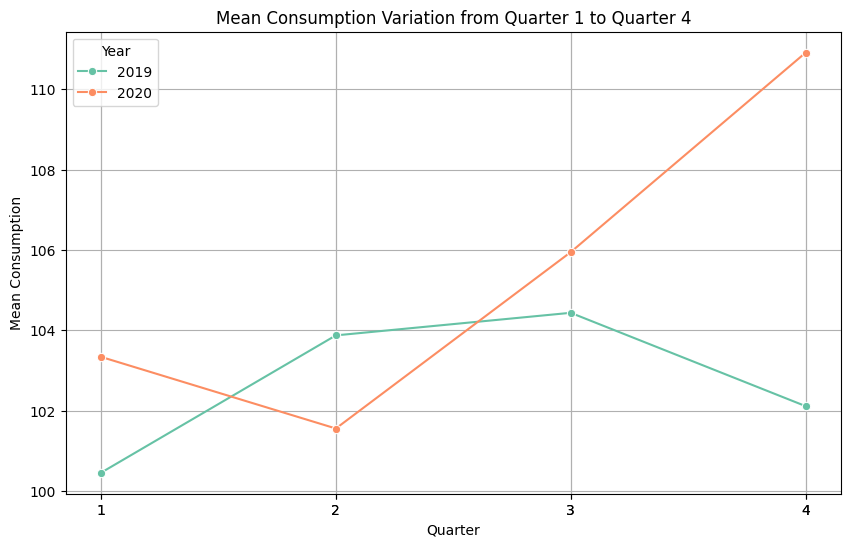

In [ ]:
quarterly_mean_usage = df1.groupby(['Quarter', 'Year'])['Usage'].mean().reset_index()

# Plot the mean consumption for each quarter
plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_mean_usage, x='Quarter', y='Usage', hue='Year',palette='Set2',marker='o')
plt.title('Mean Consumption Variation from Quarter 1 to Quarter 4')
plt.xlabel('Quarter')
plt.ylabel('Mean Consumption')
plt.xticks(quarterly_mean_usage['Quarter'])
plt.grid(True)
plt.show()


*In 2019, Highest consumption was made in quarter 3 whereas in 2020, Highest consumption occured in quarter 4*

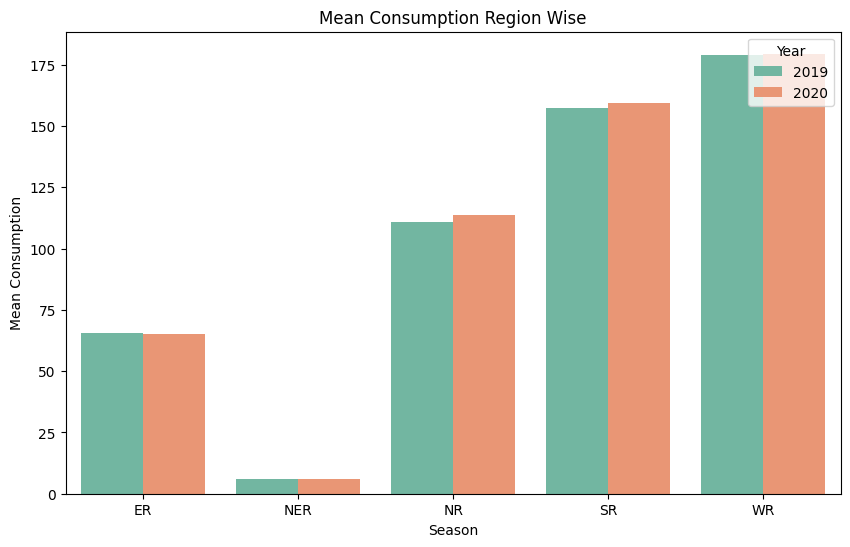

In [ ]:
# Combine the region columns into a single 'Region' column
df1['Region'] = df1[['Regions_ER', 'Regions_NER', 'Regions_NR', 'Regions_SR', 'Regions_WR']].idxmax(axis=1).str.replace('Regions_', '')

# Create a bar plot of usage by region
regional_mean_usage = df1.groupby(['Region', 'Year'])['Usage'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_mean_usage, x='Region', y='Usage', hue='Year',palette='Set2')
plt.title('Mean Consumption Region Wise')
plt.xlabel('Season')
plt.ylabel('Mean Consumption')
plt.legend(title='Year', loc='upper right')
plt.show()


*WR Region is the highest consumer of electricity*

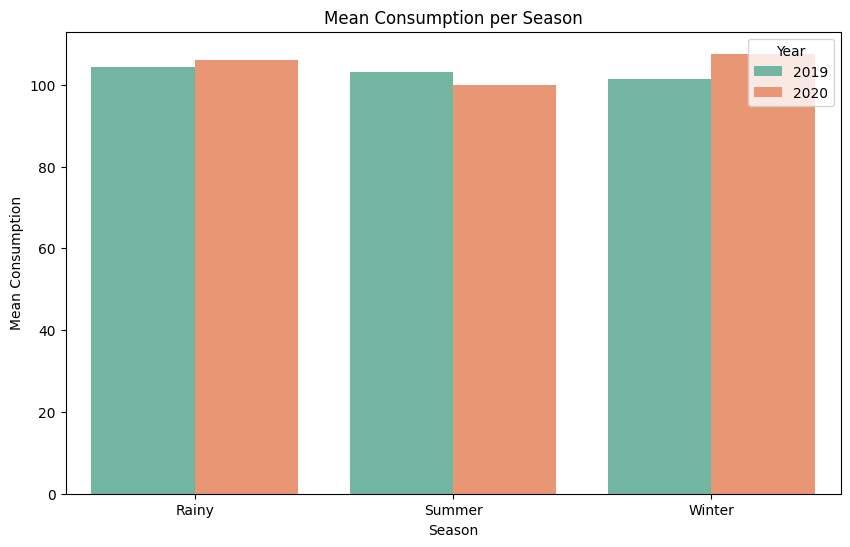

In [ ]:
seasonal_mean_usage = df1.groupby(['Season', 'Year'])['Usage'].mean().reset_index()

# Plot the mean consumption per season year-wise
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_mean_usage, x='Season', y='Usage', hue='Year',palette='Set2')
plt.title('Mean Consumption per Season')
plt.xlabel('Season')
plt.ylabel('Mean Consumption')
plt.legend(title='Year', loc='upper right')
plt.show()

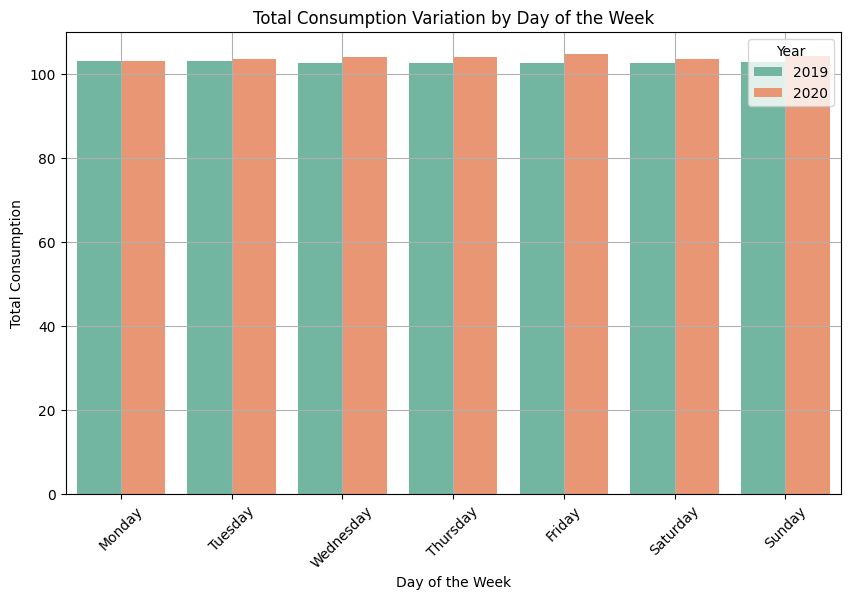

In [ ]:
mean_consumption_by_day = df1.groupby(['Year','Day of the Week'])['Usage'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=mean_consumption_by_day, x='Day of the Week', y='Usage', hue='Year',palette='Set2',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Total Consumption Variation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Days of the Week does not make much difference in consumption*

### Model Building and Evaluation

#### PROPHET MODEL

In [ ]:
df1.head()

States   latitude  longitude      Dates  Usage  Year  Month  Quarter  \
0     Punjab  31.519974  75.980003 2019-01-02  119.9  2019      1        1   
1    Haryana  28.450006  77.019991 2019-01-02  130.3  2019      1        1   
2  Rajasthan  26.449999  74.639981 2019-01-02  234.1  2019      1        1   
3      Delhi  28.669993  77.230004 2019-01-02   85.8  2019      1        1   
4         UP  27.599981  78.050006 2019-01-02  313.9  2019      1        1   

  Day of the Week  Season  Regions_ER  Regions_NER  Regions_NR  Regions_SR  \
0       Wednesday  Winter       False        False        True       False   
1       Wednesday  Winter       False        False        True       False   
2       Wednesday  Winter       False        False        True       False   
3       Wednesday  Winter       False        False        True       False   
4       Wednesday  Winter       False        False        True       False   

   Regions_WR Region  
0       False     NR  
1       False     NR  
2       False     NR  
3       False     NR  
4       False     NR

In [ ]:
!python -m pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
state_forecasts = {}

# Iterate over unique states
for state in df1['States'].unique():
    # Filter the DataFrame for the current state
    state_df = df1[df1['States'] == state]

    # Rename columns as required by Prophet ('ds' for dates, 'y' for target variable)
    state_df_prophet = state_df.rename(columns={'Dates': 'ds', 'Usage': 'y'})

    # Instantiate Prophet model
    model = Prophet()

    # Fit the model
    model.fit(state_df_prophet)

    # Define future dates for prediction
    future_dates = model.make_future_dataframe(periods=365)  # 1 year into the future

    # Make predictions
    forecast = model.predict(future_dates)

    # Store the model and forecast in the dictionary
    state_forecasts[state] = {'model': model, 'forecast': forecast}

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjjjhnmd/kj5ilw3v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjjjhnmd/eiwkwj1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22862', 'data', 'file=/tmp/tmptjjjhnmd/kj5ilw3v.json', 'init=/tmp/tmptjjjhnmd/eiwkwj1r.json', 'output', 'file=/tmp/tmptjjjhnmd/prophet_modelhulm41ef/prophet_model-20240518124831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:48:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:48:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

In [ ]:
delhi_forecast=state_forecasts['Delhi']['forecast']

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2019-01-02  81.860414   48.699342  114.542320    81.860414    81.860414   
1   2019-01-03  81.865271   47.252207  116.291629    81.865271    81.865271   
2   2019-01-04  81.870127   49.542507  113.851983    81.870127    81.870127   
3   2019-01-05  81.874984   50.549171  115.076517    81.874984    81.874984   
4   2019-01-06  81.879840   48.949755  115.352024    81.879840    81.879840   
..         ...        ...         ...         ...          ...          ...   
858 2021-12-01  88.944957   54.928431  118.275479    88.824738    89.062862   
859 2021-12-02  88.952050   54.311369  117.923324    88.831491    89.070163   
860 2021-12-03  88.959143   55.202693  120.732962    88.838283    89.077461   
861 2021-12-04  88.966236   57.297596  122.803213    88.845142    89.084932   
862 2021-12-05  88.973329   55.741359  123.306934    88.852002    89.092382   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         -1.466711             -1.466711             -1.466711 -1.466711   
1         -1.532415             -1.532415             -1.532415 -1.532415   
2         -0.090324             -0.090324             -0.090324 -0.090324   
3          0.834663              0.834663              0.834663  0.834663   
4          1.519227              1.519227              1.519227  1.519227   
..              ...                   ...                   ...       ...   
858       -1.466711             -1.466711             -1.466711 -1.466711   
859       -1.532415             -1.532415             -1.532415 -1.532415   
860       -0.090324             -0.090324             -0.090324 -0.090324   
861        0.834663              0.834663              0.834663  0.834663   
862        1.519227              1.519227              1.519227  1.519227   

     weekly_lower  weekly_upper  multiplicative_terms  \
0       -1.466711     -1.466711                   0.0   
1       -1.532415     -1.532415                   0.0   
2       -0.090324     -0.090324                   0.0   
3        0.834663      0.834663                   0.0   
4        1.519227      1.519227                   0.0   
..            ...           ...                   ...   
858     -1.466711     -1.466711                   0.0   
859     -1.532415     -1.532415                   0.0   
860     -0.090324     -0.090324                   0.0   
861      0.834663      0.834663                   0.0   
862      1.519227      1.519227                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0  80.393703  
1                           0.0                         0.0  80.332856  
2                           0.0                         0.0  81.779803  
3                           0.0                         0.0  82.709647  
4                           0.0                         0.0  83.399068  
..                          ...                         ...        ...  
858                         0.0                         0.0  87.478246  
859                         0.0                         0.0  87.419635  
860                         0.0                         0.0  88.868818  
861                         0.0                         0.0  89.800899  
862                         0.0                         0.0  90.492556  

[863 rows x 16 columns]

Evaluate the model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize lists to store evaluation metrics and states
mae_list = []
rmse_list = []
state_list = []

# Iterate over the state forecasts dictionary
for state, forecast_data in state_forecasts.items():
    # Get the forecast DataFrame
    forecast = forecast_data['forecast']

    # Filter the actual data for the current state
    actual_data = df1[df1['States'] == state].set_index('Dates')['Usage']

    # Filter the forecasted data for the evaluation period
    forecast = forecast.set_index('ds').loc[actual_data.index]

    # Calculate MAE and RMSE
    mae = mean_absolute_error(actual_data, forecast['yhat'])
    rmse = np.sqrt(mean_squared_error(actual_data, forecast['yhat']))

    # Append the metrics and state to the lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    state_list.append(state)

# Create a DataFrame from the lists
evaluation_df = pd.DataFrame({'State': state_list,'MAE': mae_list, 'RMSE': rmse_list})

# Display the DataFrame
evaluation_df


State        MAE       RMSE
0              Punjab  45.406445  56.678267
1             Haryana  30.804130  37.953569
2           Rajasthan  20.817622  27.286193
3               Delhi  22.242534  25.832477
4                  UP  56.948349  66.347842
5         Uttarakhand   4.943882   6.680664
6                  HP   3.371930   4.784882
7                 J&K   3.640963   4.756567
8          Chandigarh   0.947869   1.138589
9        Chhattisgarh   8.375754  10.065112
10            Gujarat  28.529576  38.055139
11                 MP  26.011232  30.987199
12        Maharashtra  34.566441  41.693882
13                Goa   1.188808   1.514957
14                DNH   2.988605   4.565235
15     Andhra Pradesh  13.635921  15.657187
16          Telangana  25.145664  29.584784
17          Karnataka  25.138027  29.964428
18             Kerala   5.465327   6.799283
19         Tamil Nadu  28.833452  34.895684
20              Pondy   0.849940   1.117169
21              Bihar  12.590986  14.888803
22          Jharkhand   1.463948   1.941373
23             Odisha   8.934975  10.843609
24        West Bengal  24.277691  27.810233
25             Sikkim   0.273278   0.362555
26  Arunachal Pradesh   0.156320   0.228218
27              Assam   3.758948   4.714242
28            Manipur   0.165609   0.222306
29          Meghalaya   0.534907   0.713754
30            Mizoram   0.110243   0.143505
31           Nagaland   0.108150   0.143572
32            Tripura   0.615508   0.744998

Usage Forecast

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


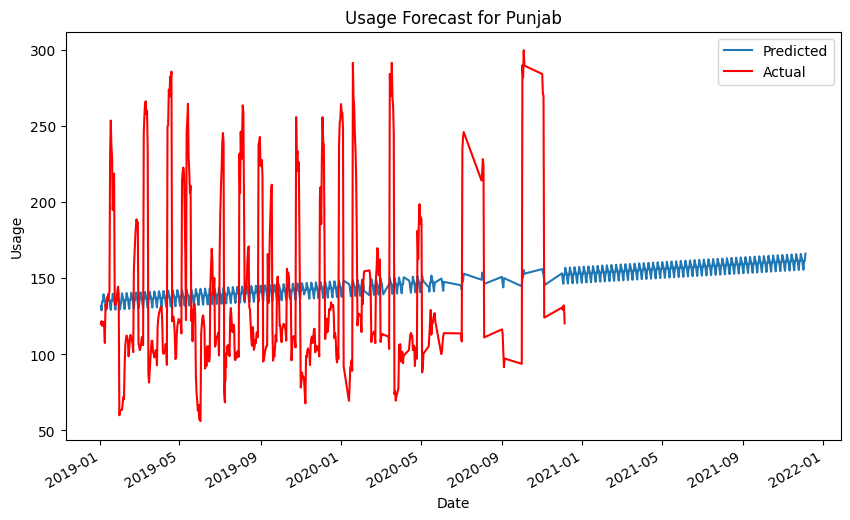

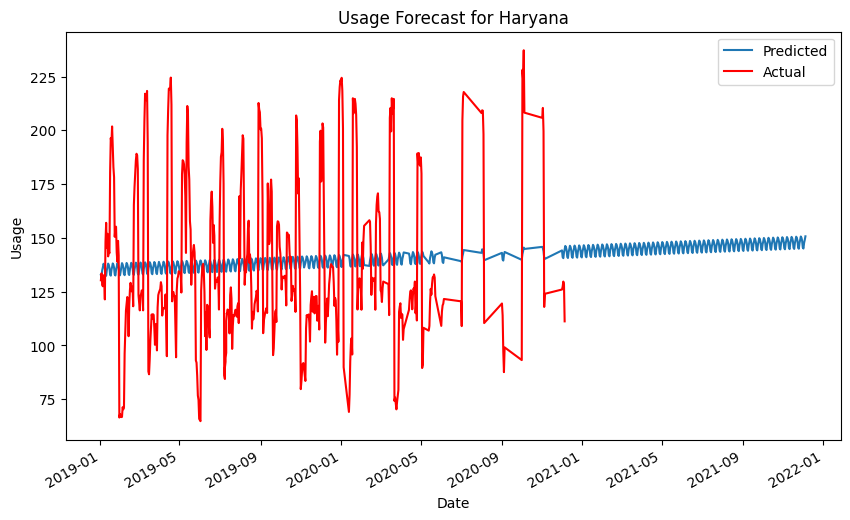

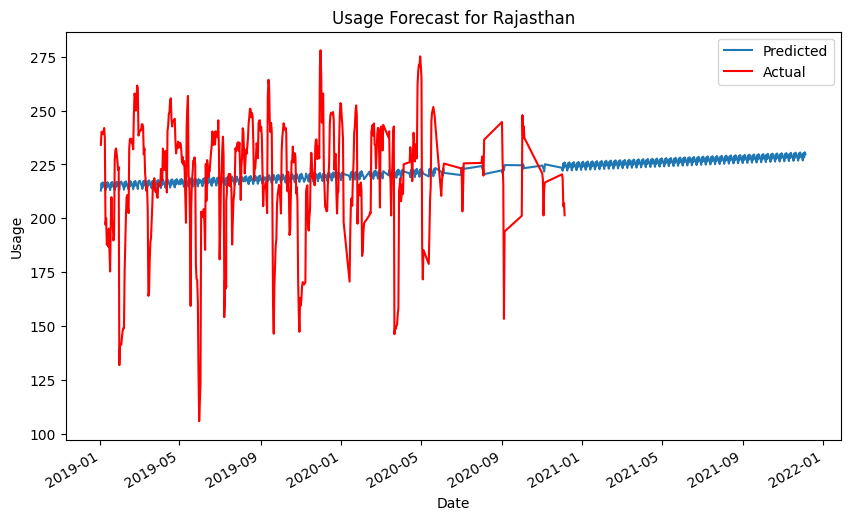

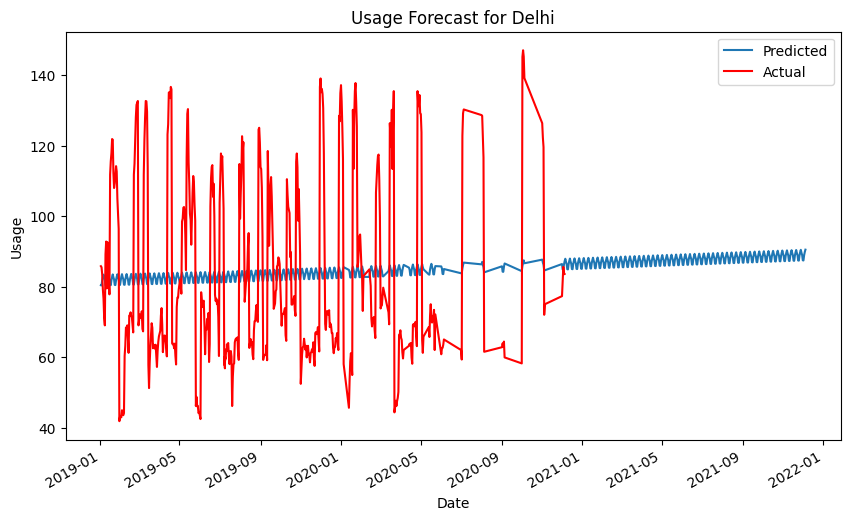

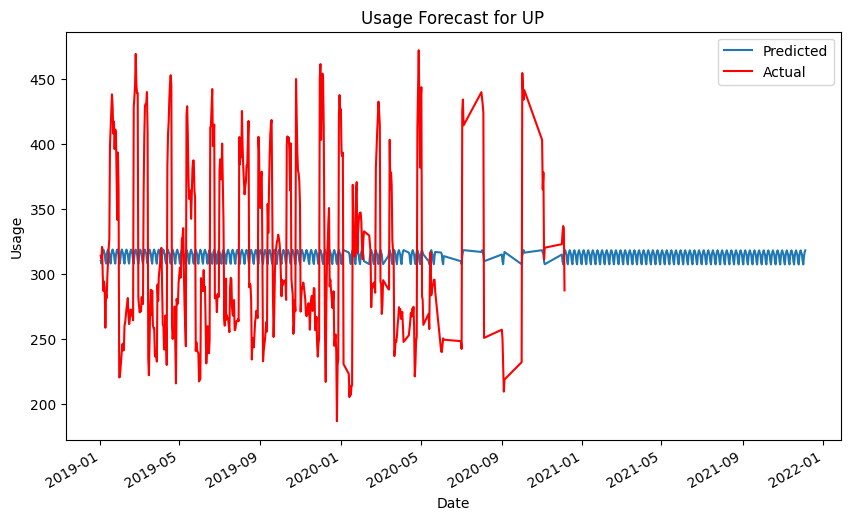

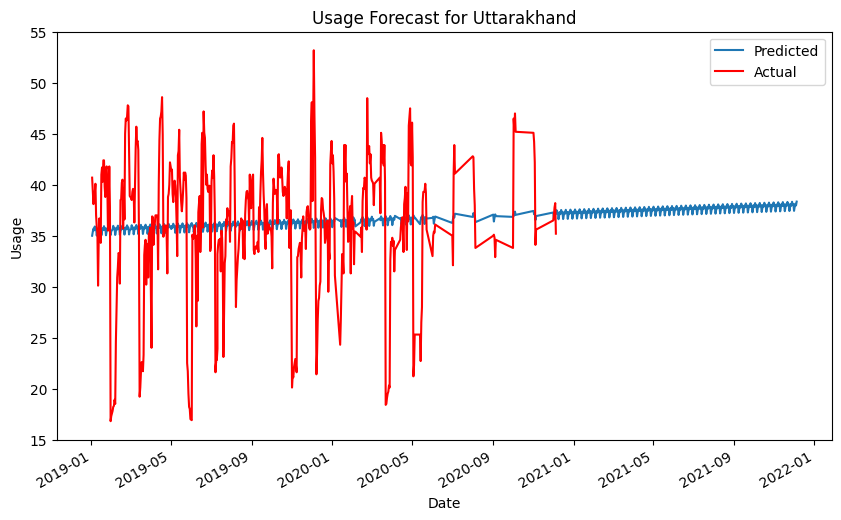

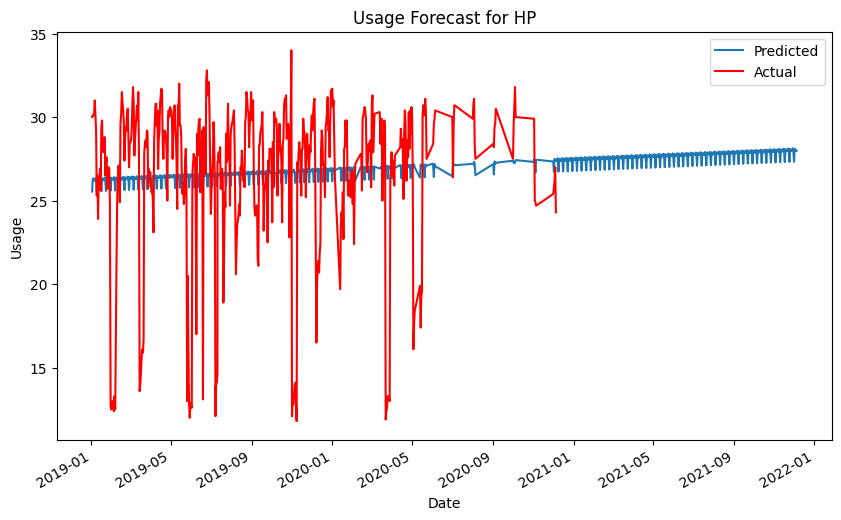

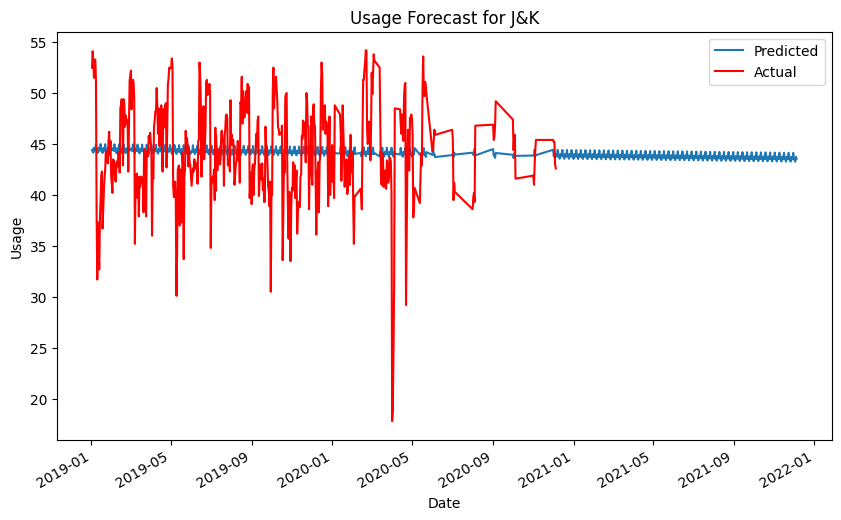

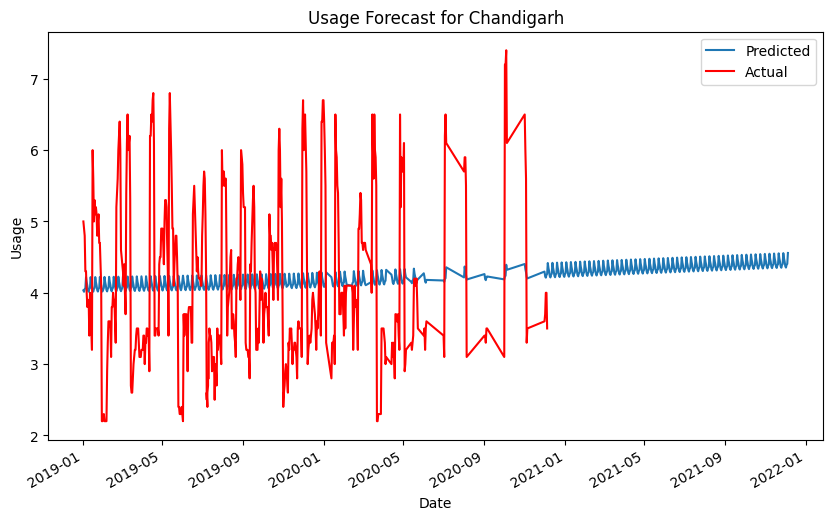

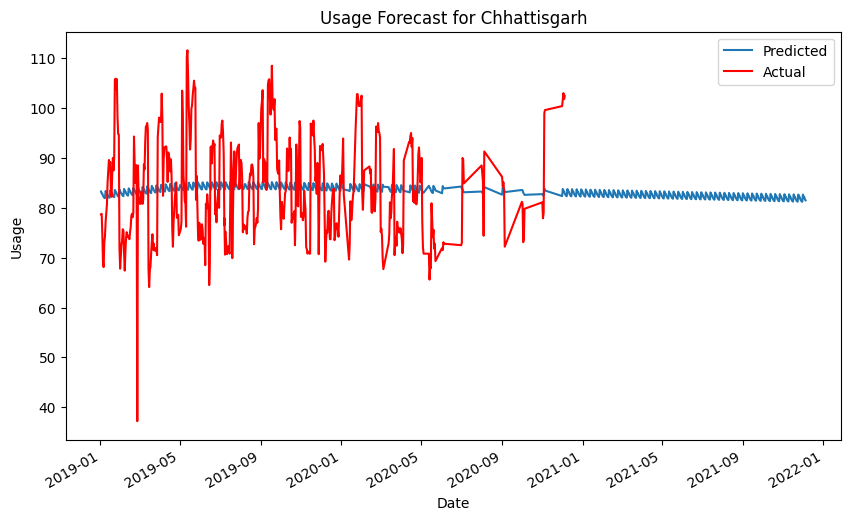

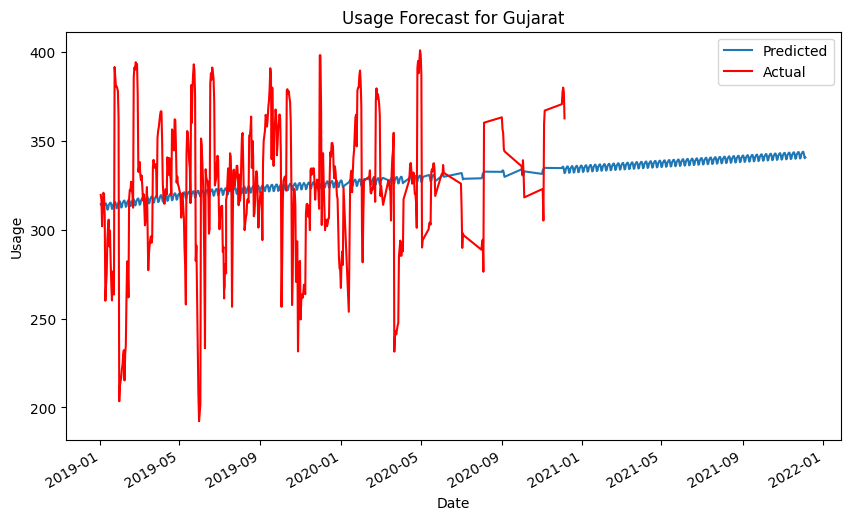

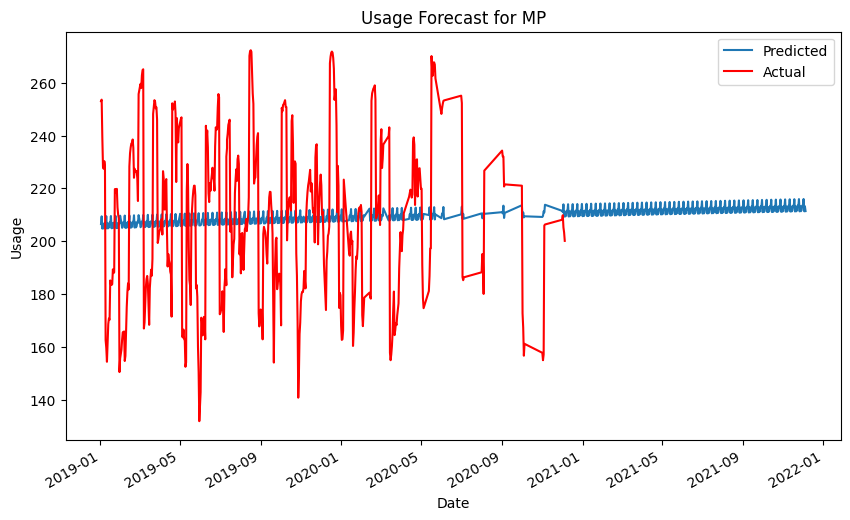

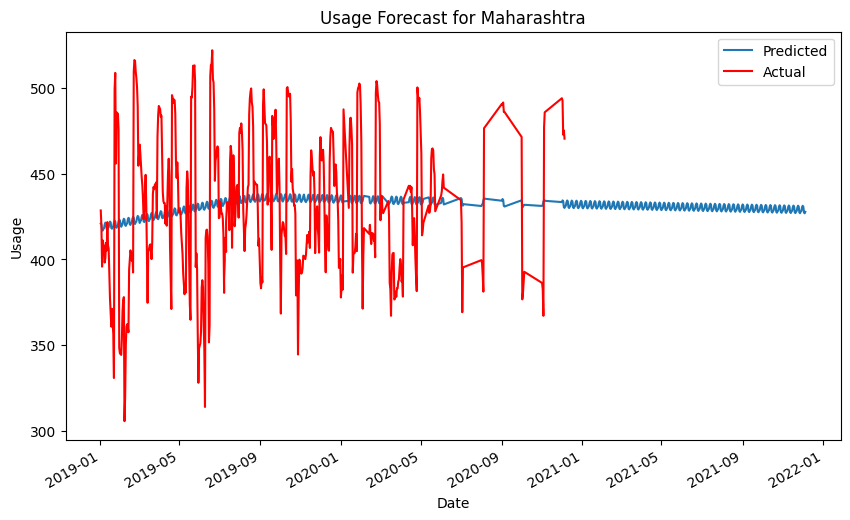

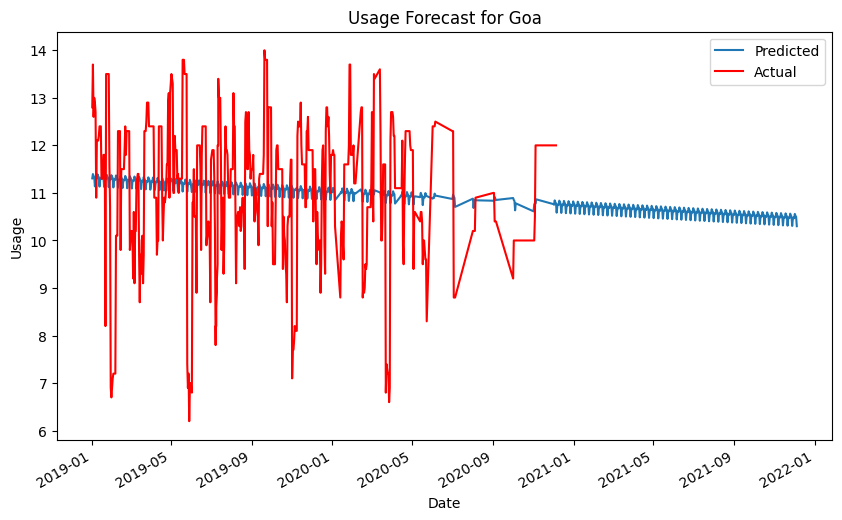

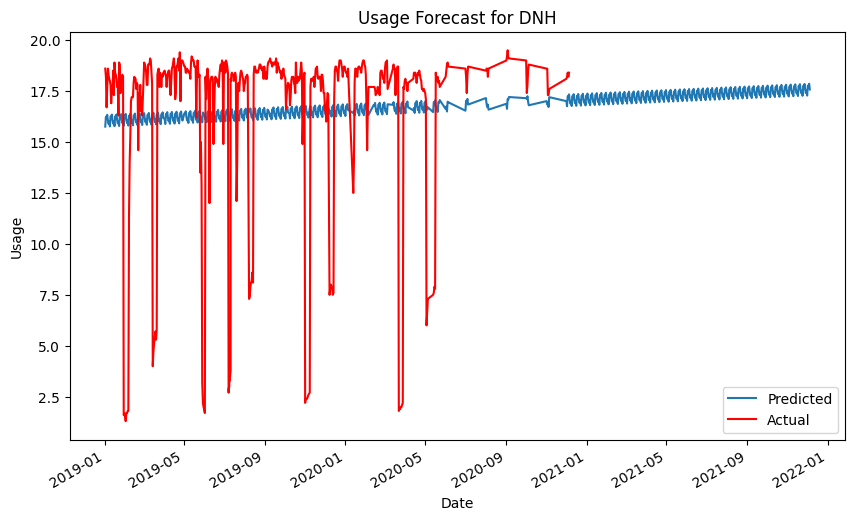

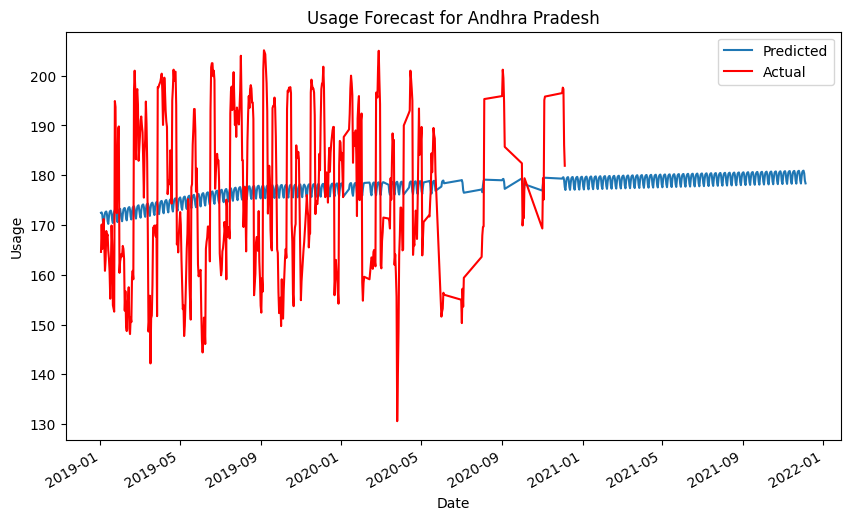

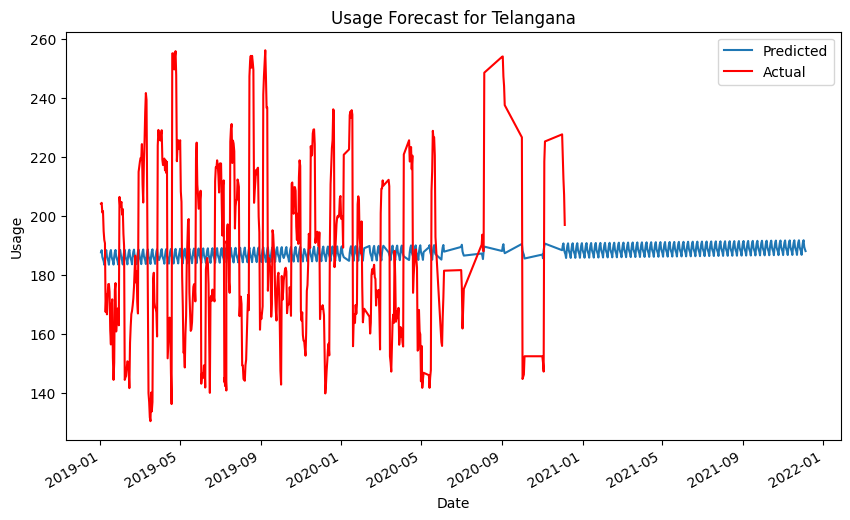

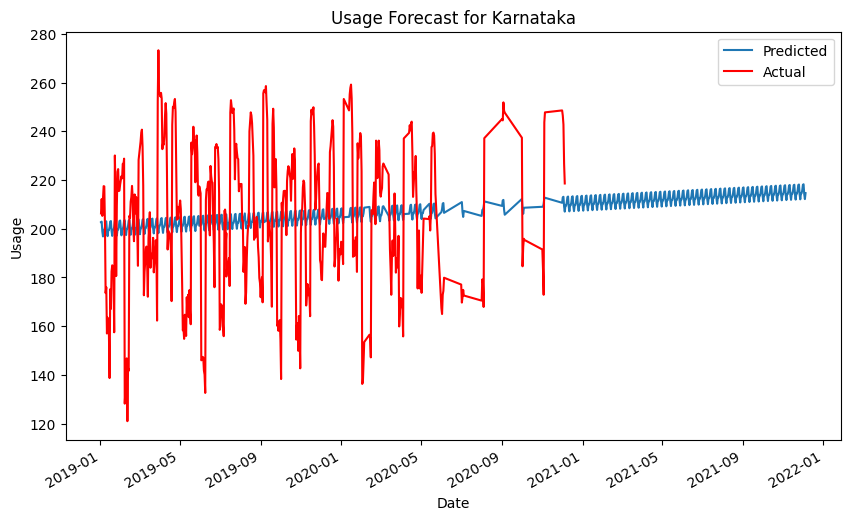

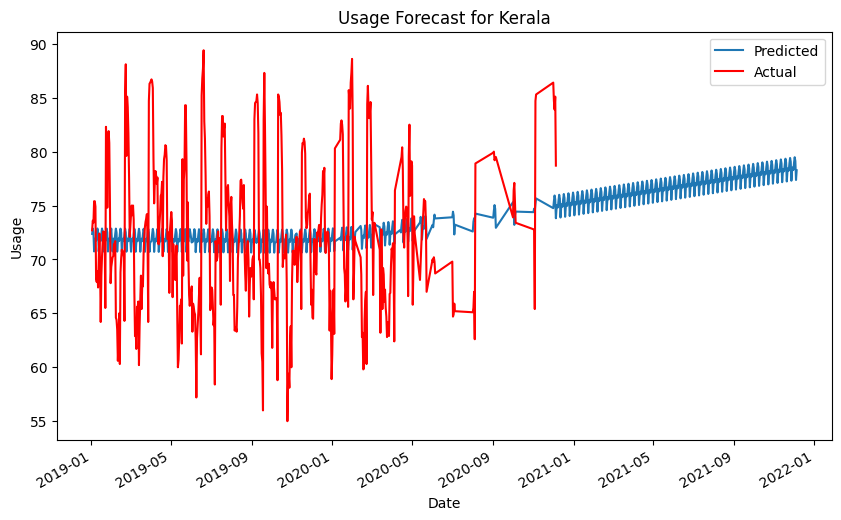

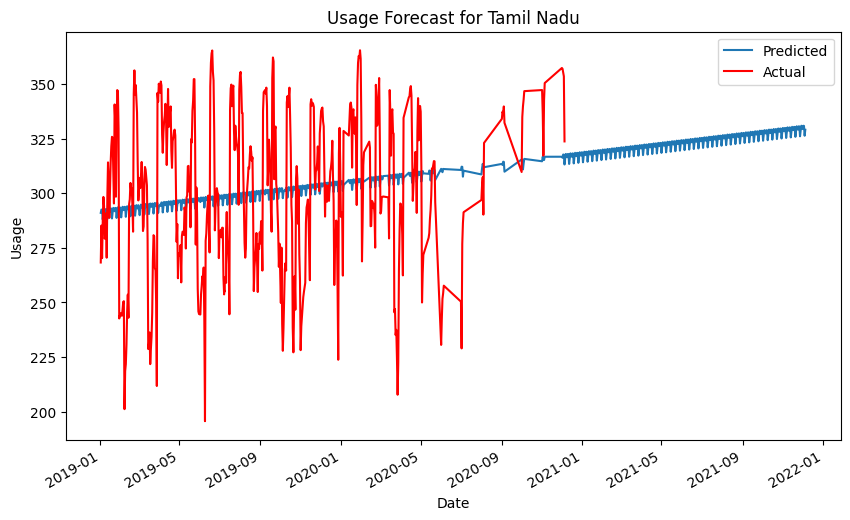

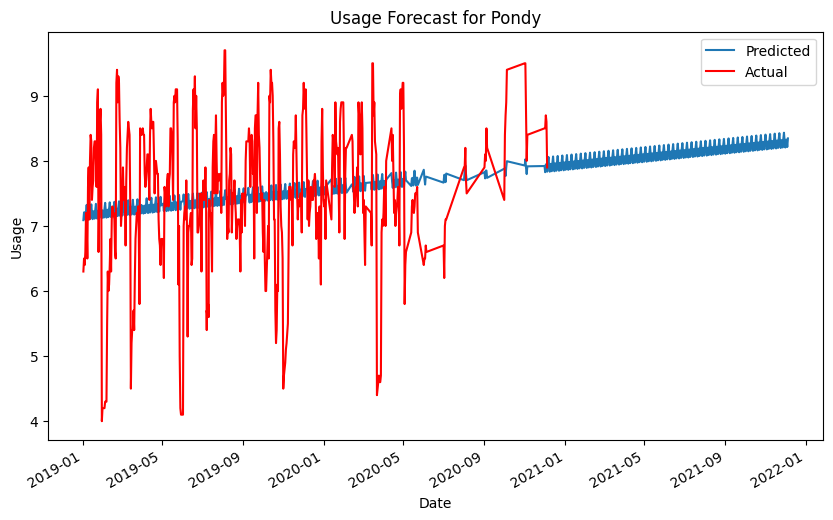

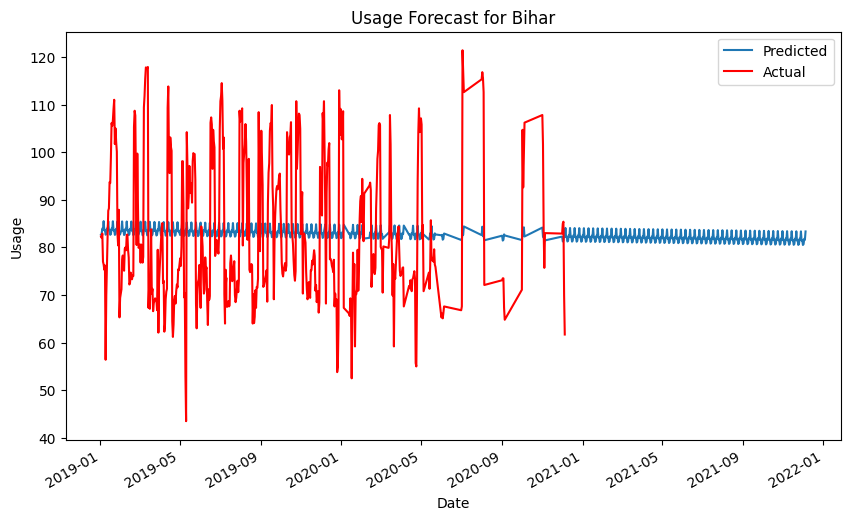

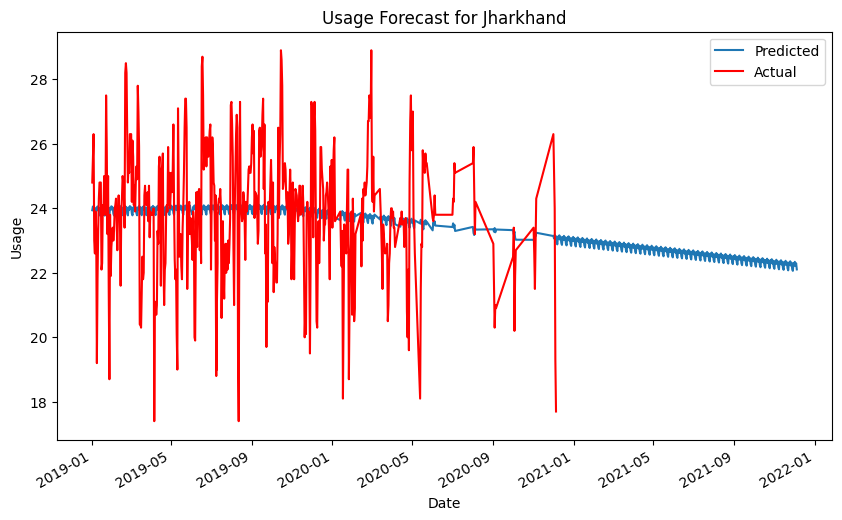

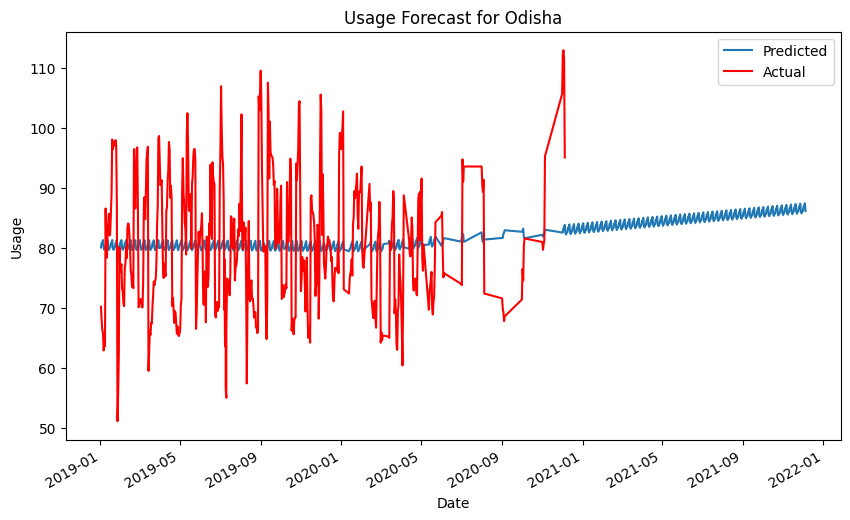

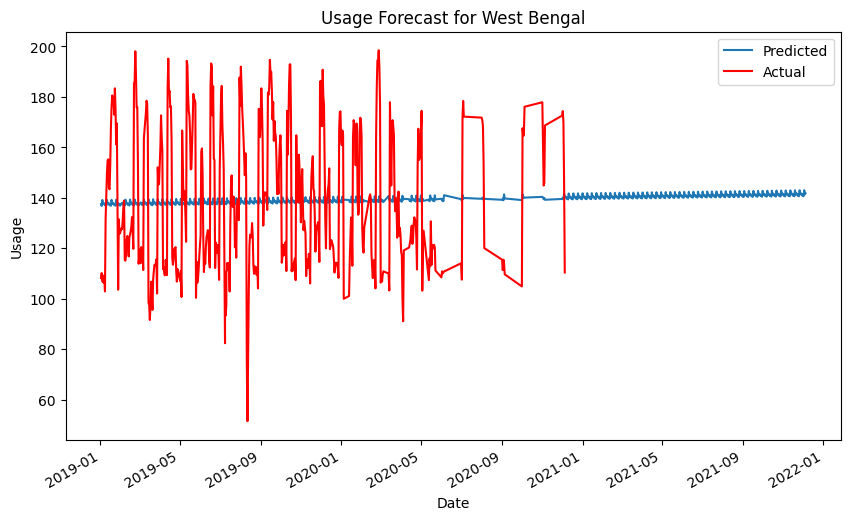

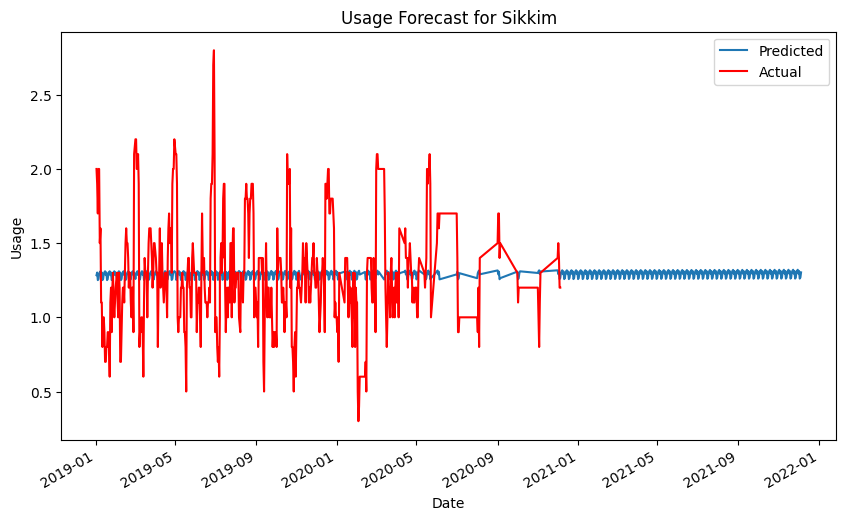

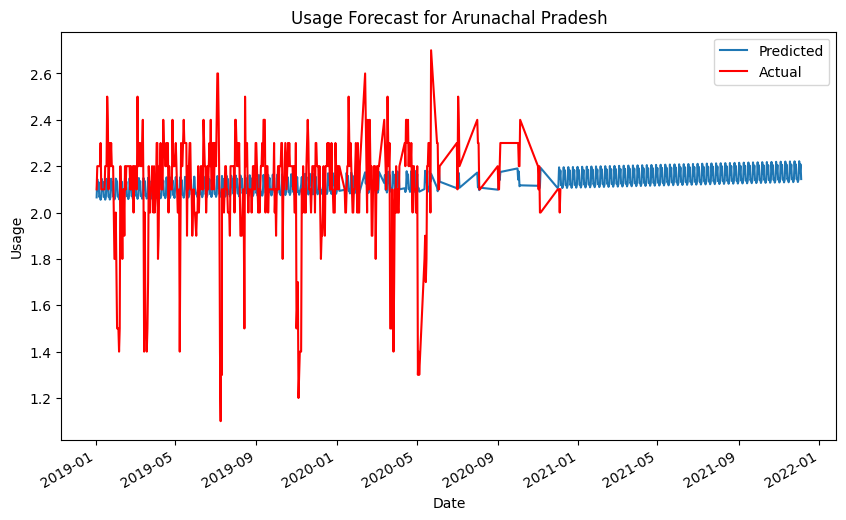

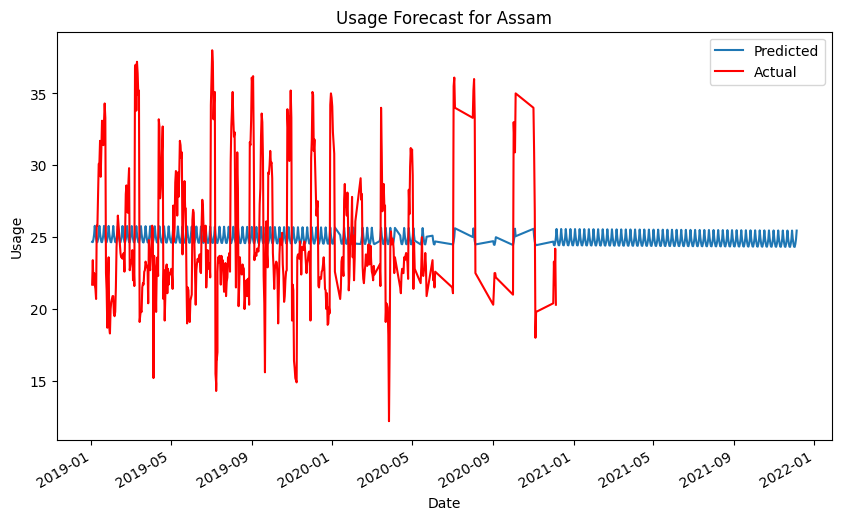

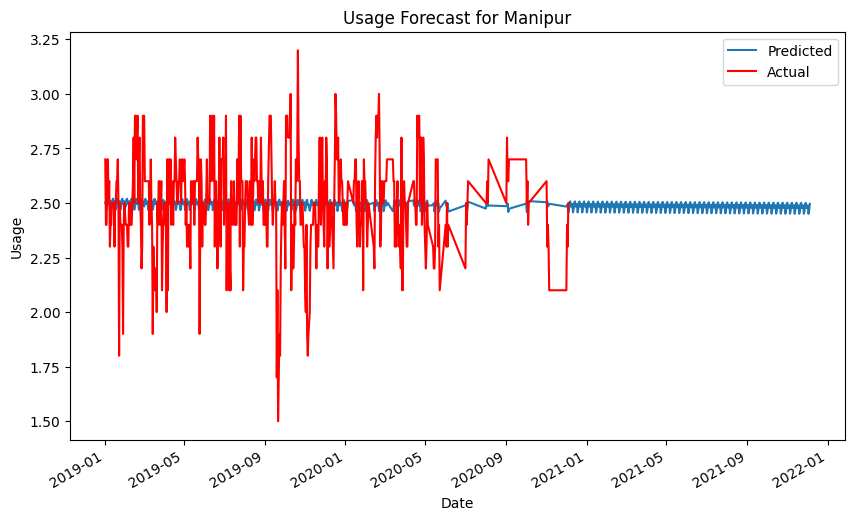

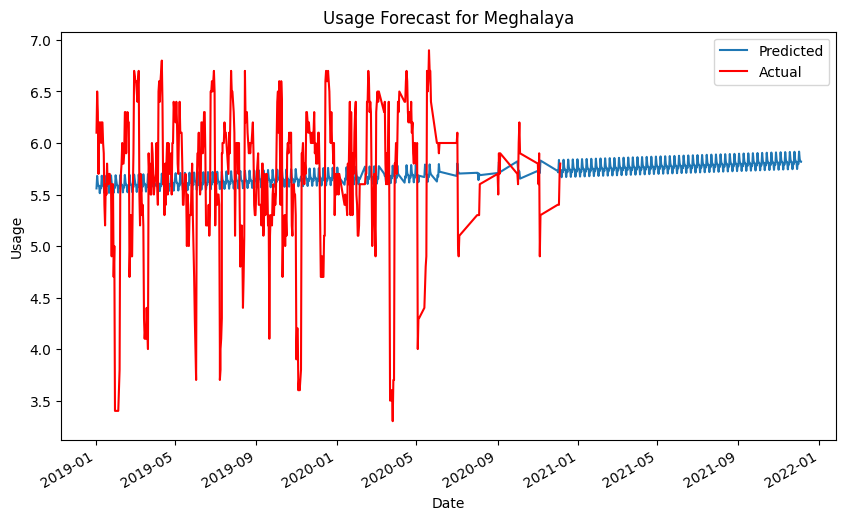

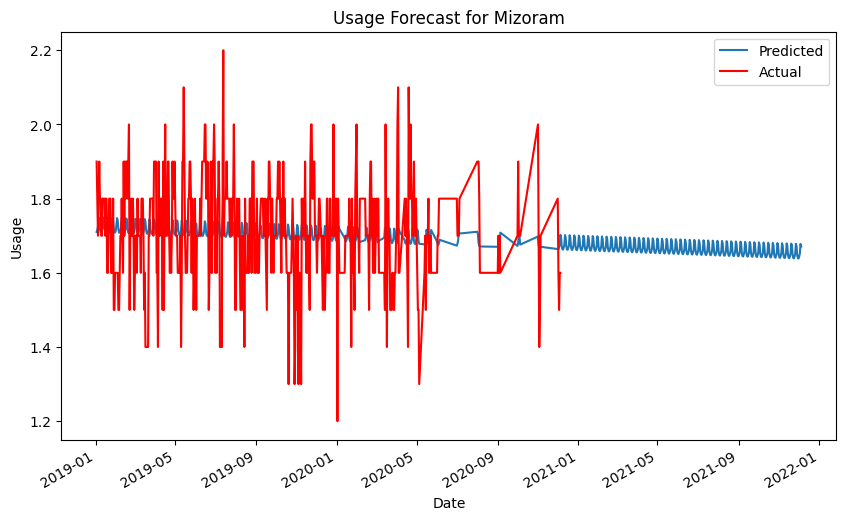

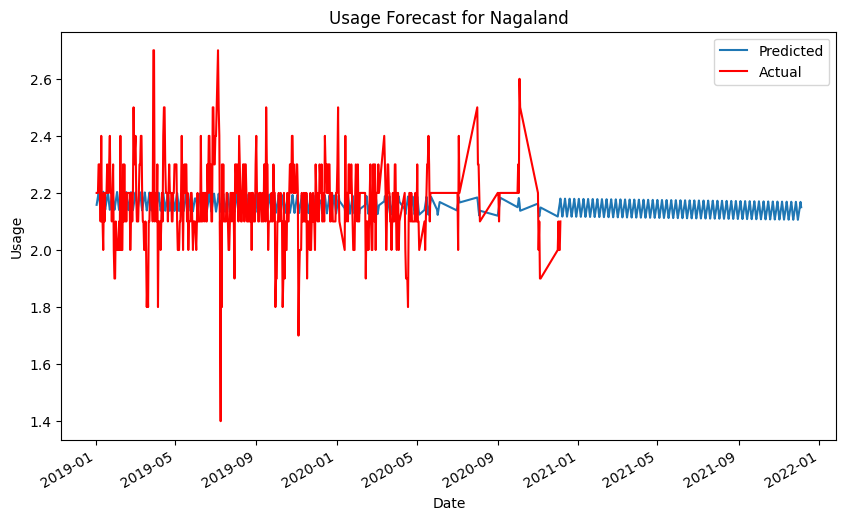

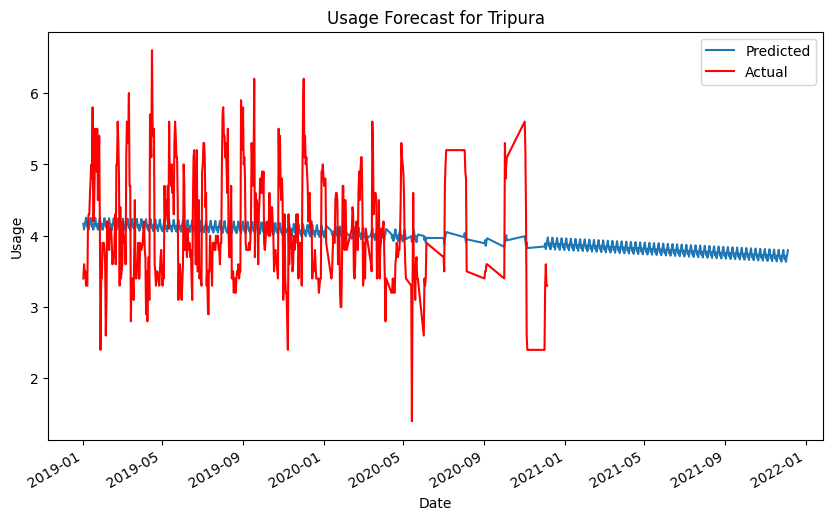

In [ ]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the plots for each state
state_plots = {}

# Iterate over the state forecasts dictionary
for state, forecast_data in state_forecasts.items():
    # Get the forecast DataFrame
    forecast = forecast_data['forecast']

    # Plot the forecast
    fig = forecast.plot(x='ds', y='yhat', label='Predicted', figsize=(10, 6))

    # Plot the actual data
    actual_data = df1[df1['States'] == state].set_index('Dates')
    plt.plot(actual_data.index, actual_data['Usage'], label='Actual', color='red')

    # Set plot title and labels
    plt.title(f'Usage Forecast for {state}')
    plt.xlabel('Date')
    plt.ylabel('Usage')
    plt.legend()

    # Store the plot in the dictionary
    state_plots[state] = fig

# Show the plots
plt.show()

#### LSTM Model

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Initialize an empty dictionary to store LSTM models and forecasts for each state
state_lstm_forecasts = {}

# Iterate over unique states
for state in df1['States'].unique():
    # Filter the DataFrame for the current state
    state_df = df1[df1['States'] == state]

    # Extract usage data for the current state
    usage_data = state_df['Usage'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(usage_data)

    # Define the number of time steps and features
    n_steps = 3  # Adjust as needed
    n_features = 1  # Usage data

    # Prepare data into sequences
    X, y = [], []
    for i in range(len(scaled_data) - n_steps):
        X.append(scaled_data[i:i+n_steps, 0])
        y.append(scaled_data[i+n_steps, 0])
    X, y = np.array(X), np.array(y)

    # Reshape input data for LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the LSTM model
    model.fit(X, y, epochs=100, batch_size=32, verbose=0)  # Adjust epochs and batch size as needed

    # Store the model in the dictionary
    state_lstm_forecasts[state] = model

# Now state_lstm_forecasts dictionary contains trained LSTM models for each state


Evaluate the model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize lists to store evaluation metrics and states
mae_list = []
rmse_list = []
state_list = []

# Iterate over the LSTM models for each state
for state, lstm_model in state_lstm_forecasts.items():
    # Filter the DataFrame for the current state
    state_df = df1[df1['States'] == state]

    # Extract usage data for the current state
    usage_data = state_df['Usage'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(usage_data)

    # Prepare test data into sequences
    X_test, y_test = [], []
    for i in range(len(scaled_data) - n_steps):
        X_test.append(scaled_data[i:i+n_steps, 0])
        y_test.append(scaled_data[i+n_steps, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape input data for LSTM (samples, time steps, features)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

    # Make predictions using the LSTM model
    predictions = lstm_model.predict(X_test)

    # Inverse transform predictions and actual values
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Append the metrics and state to the lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    state_list.append(state)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Create a DataFrame from the lists
evaluation_df = pd.DataFrame({'State': state_list,'MAE': mae_list, 'RMSE': rmse_list})

# Display the DataFrame
evaluation_df

State        MAE       RMSE
0              Punjab  19.176397  33.565795
1             Haryana  13.570220  22.581776
2           Rajasthan  10.454069  15.346571
3               Delhi   8.959475  15.136120
4                  UP  25.567084  40.412749
5         Uttarakhand   2.595204   3.999828
6                  HP   2.184693   3.157286
7                 J&K   2.454782   3.617752
8          Chandigarh   0.410634   0.690385
9        Chhattisgarh   4.742128   6.860803
10            Gujarat  14.450110  23.136757
11                 MP  10.410037  17.141047
12        Maharashtra  16.563472  25.903782
13                Goa   0.677988   1.026304
14                DNH   1.251479   2.584437
15     Andhra Pradesh   5.969710   8.921509
16          Telangana  10.712310  16.753095
17          Karnataka  12.020866  18.528193
18             Kerala   3.046819   4.593043
19         Tamil Nadu  14.551236  20.916383
20              Pondy   0.487599   0.708037
21              Bihar   6.760770   9.955043
22          Jharkhand   1.131093   1.591142
23             Odisha   4.848764   7.064652
24        West Bengal  12.662298  17.962196
25             Sikkim   0.174984   0.241409
26  Arunachal Pradesh   0.126211   0.183557
27              Assam   2.052671   3.113215
28            Manipur   0.145139   0.192280
29          Meghalaya   0.307113   0.443681
30            Mizoram   0.102986   0.133292
31           Nagaland   0.097932   0.131024
32            Tripura   0.403202   0.560311

Usage Forecast

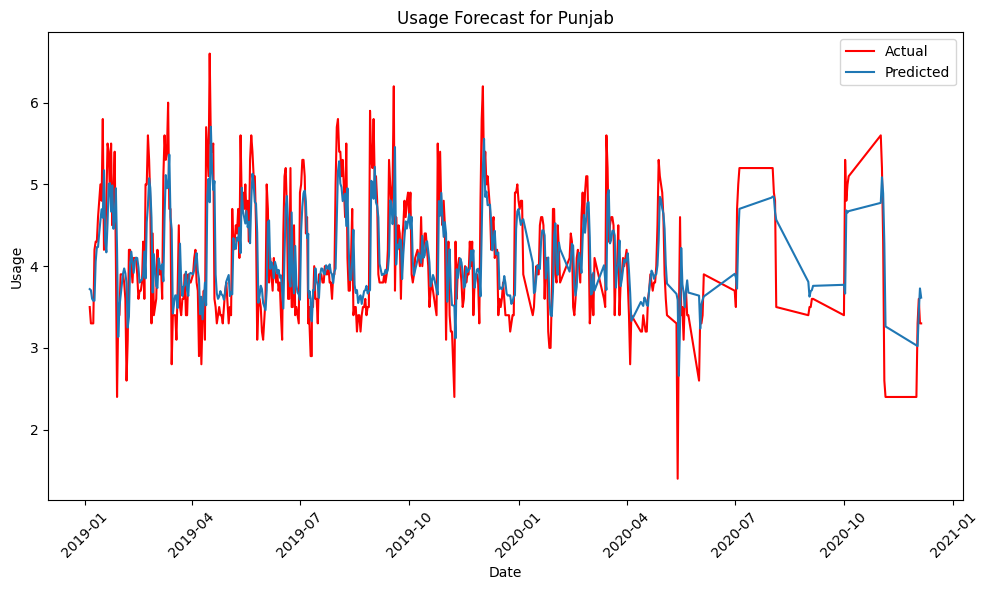

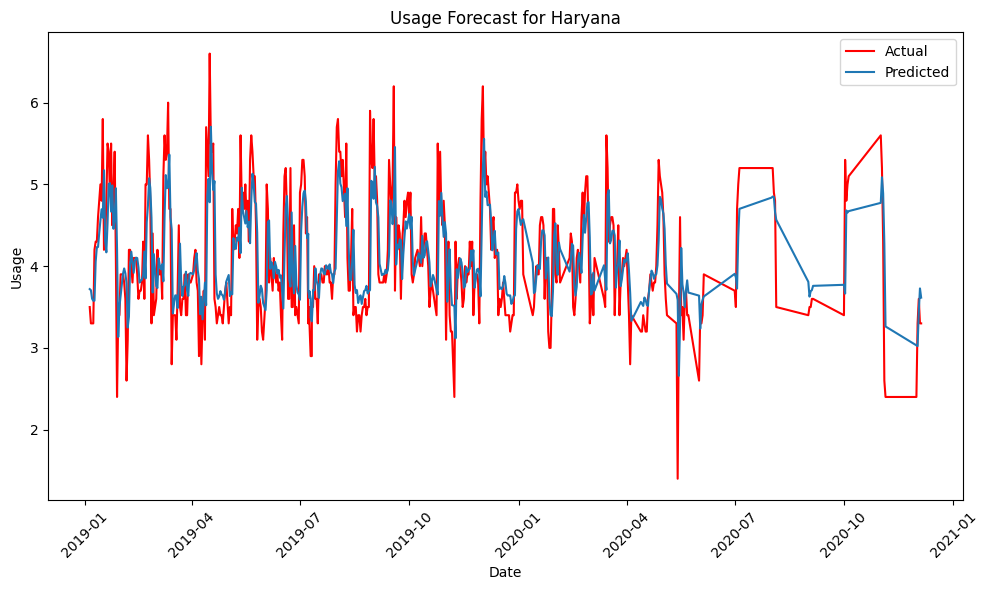

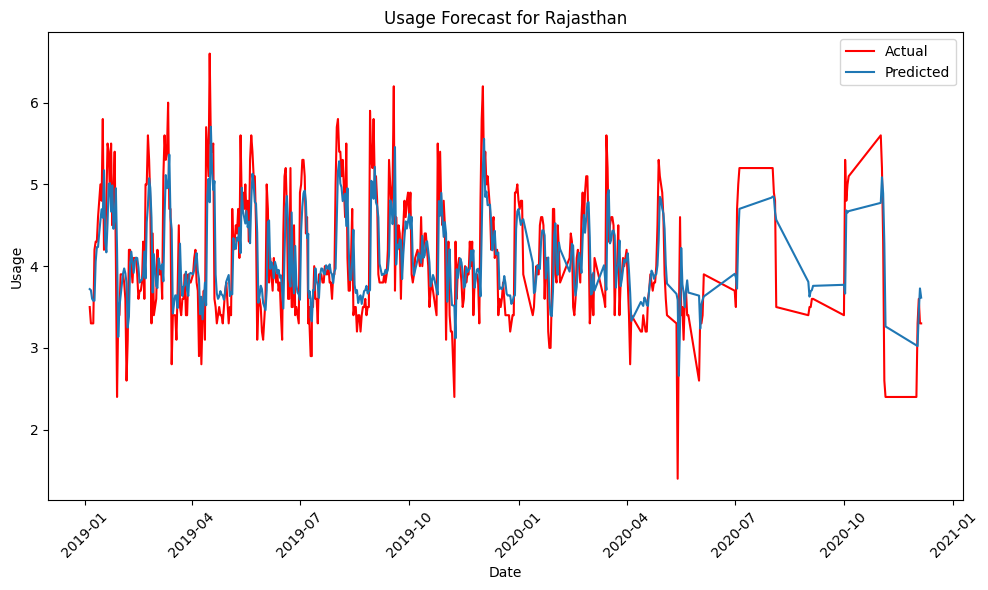

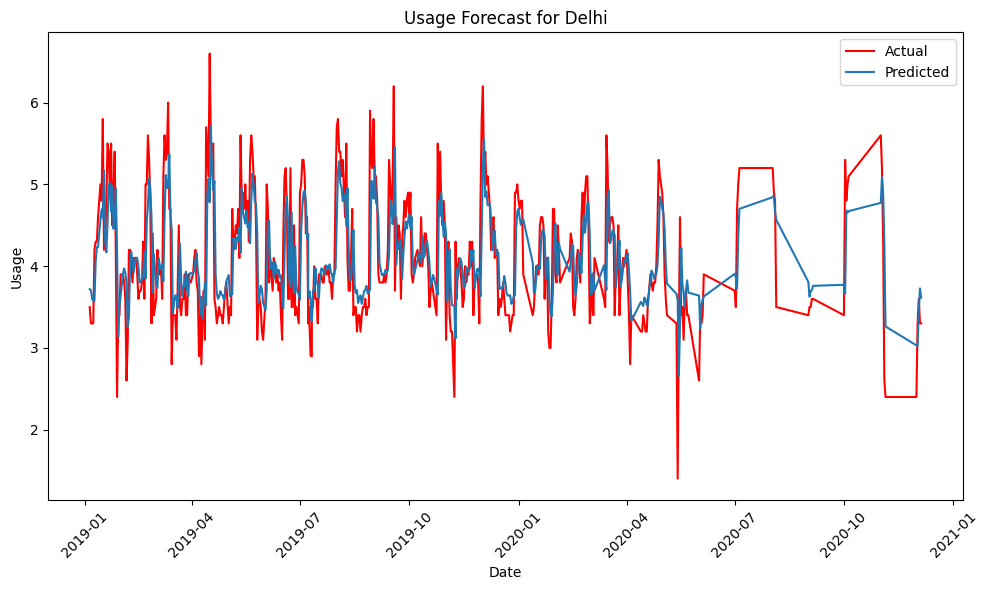

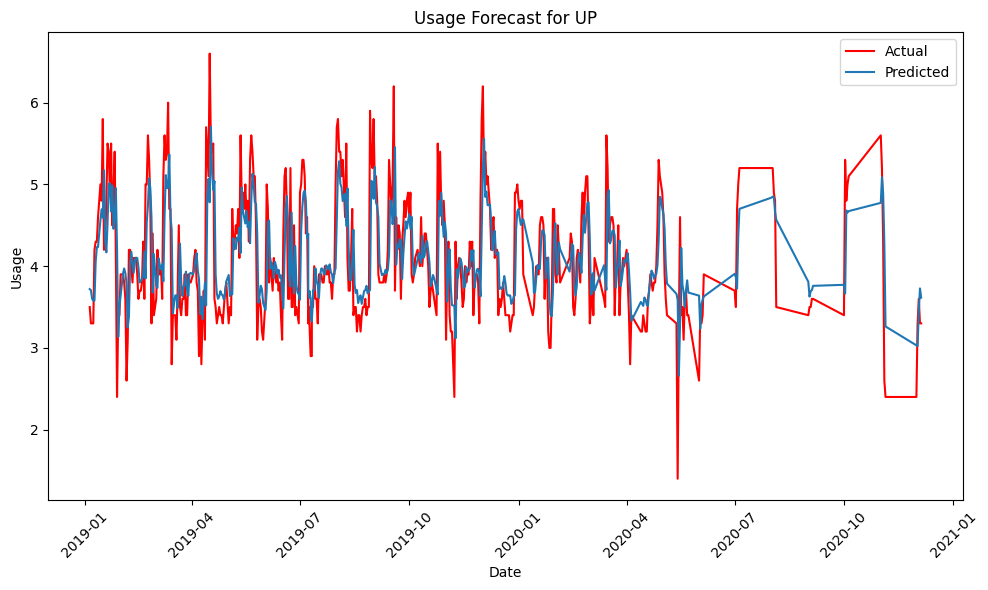

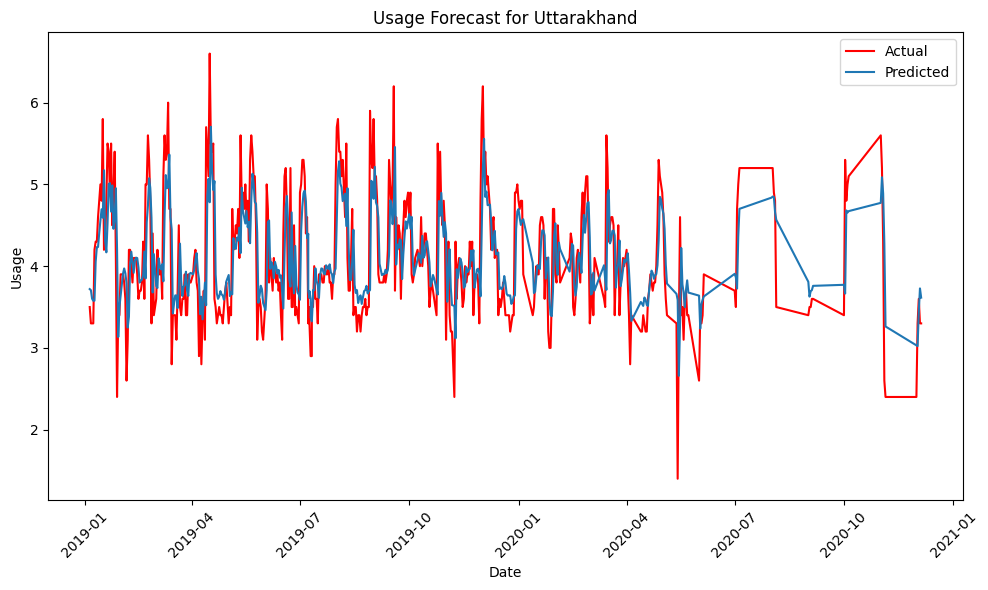

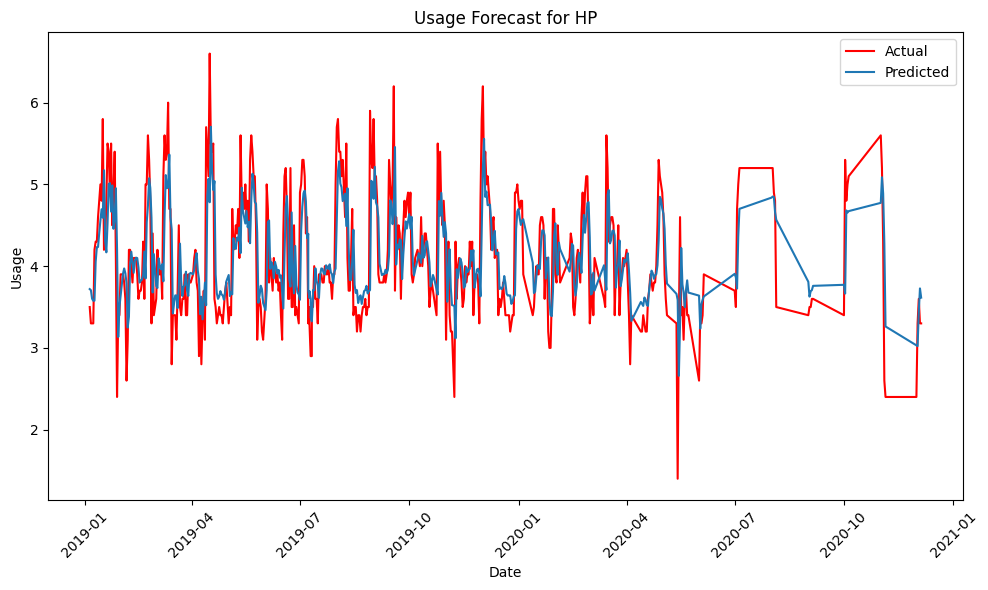

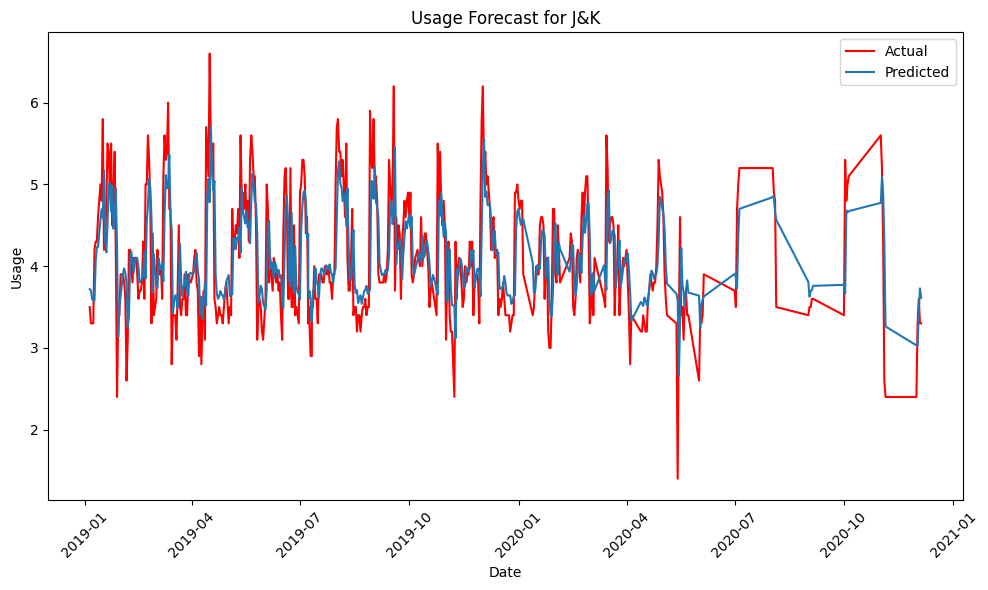

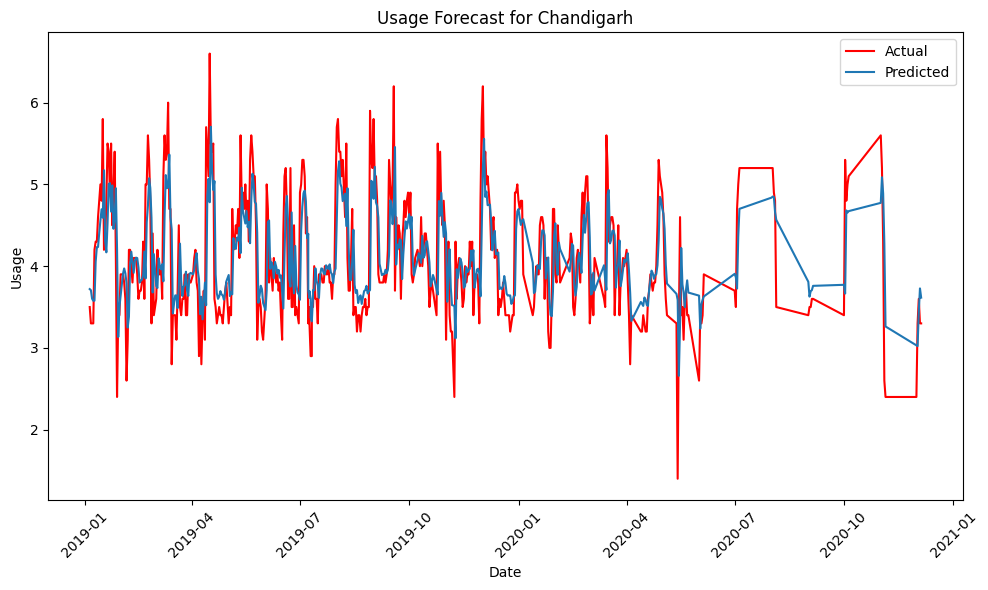

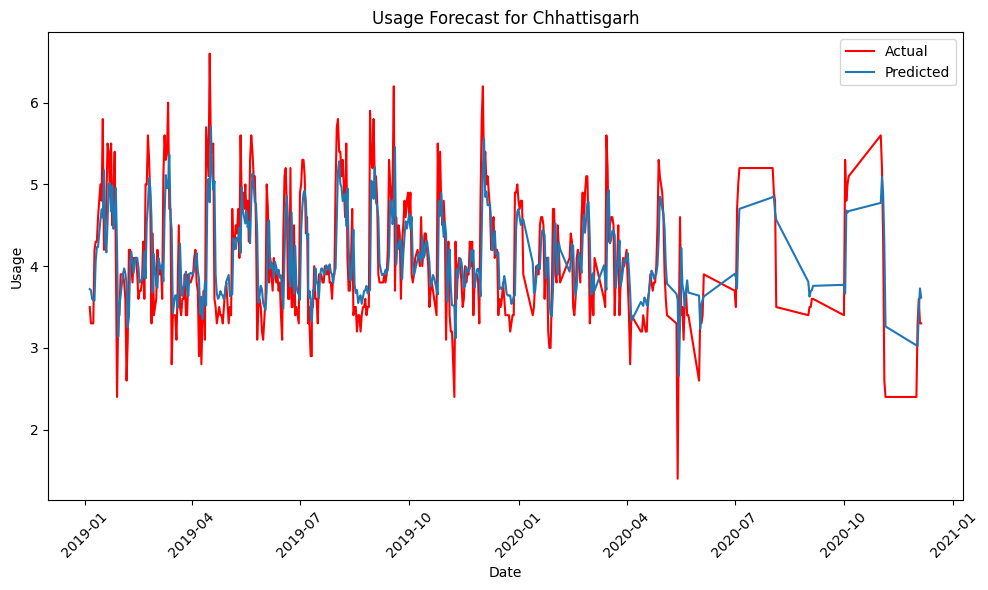

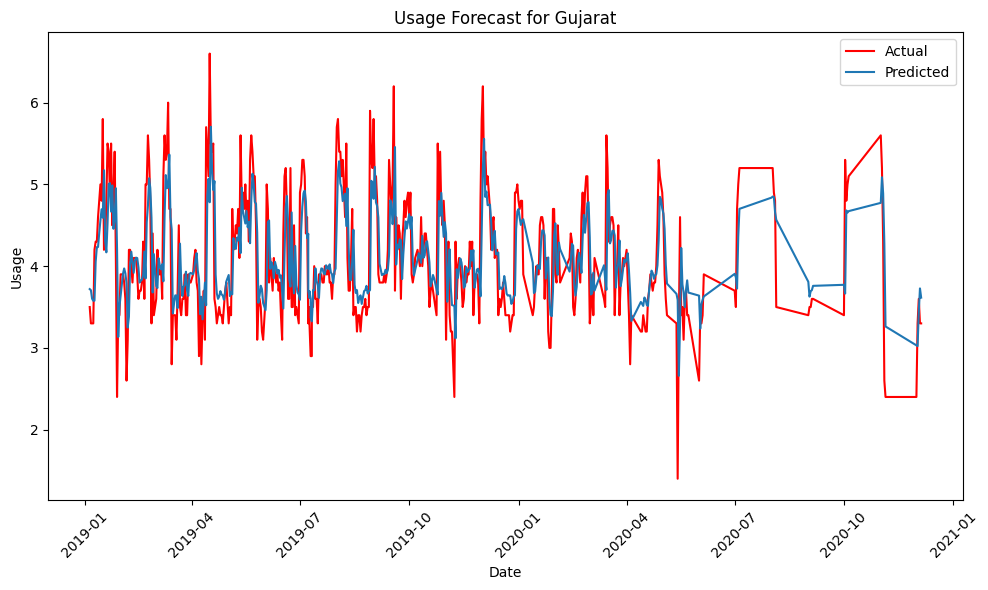

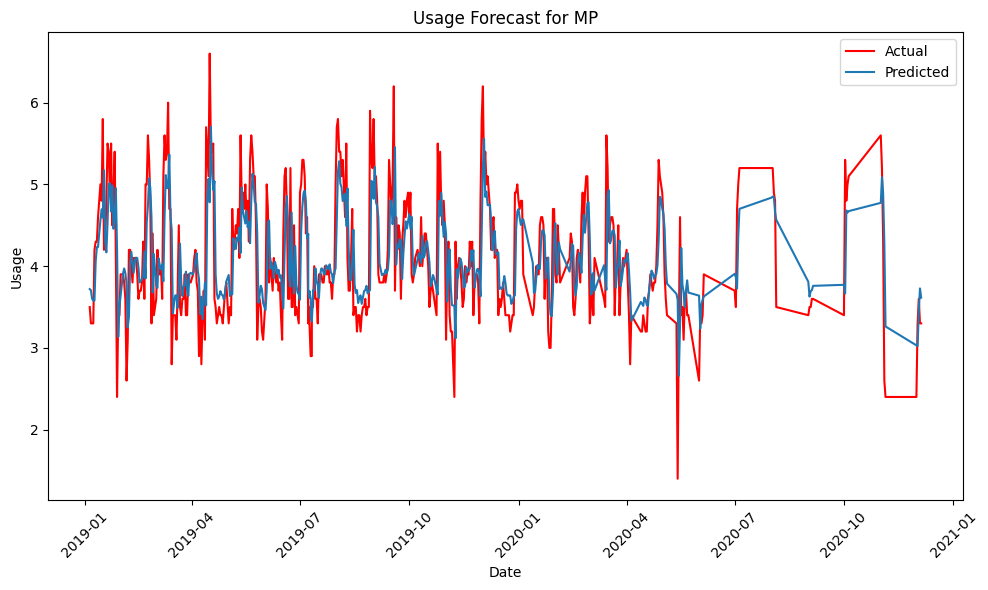

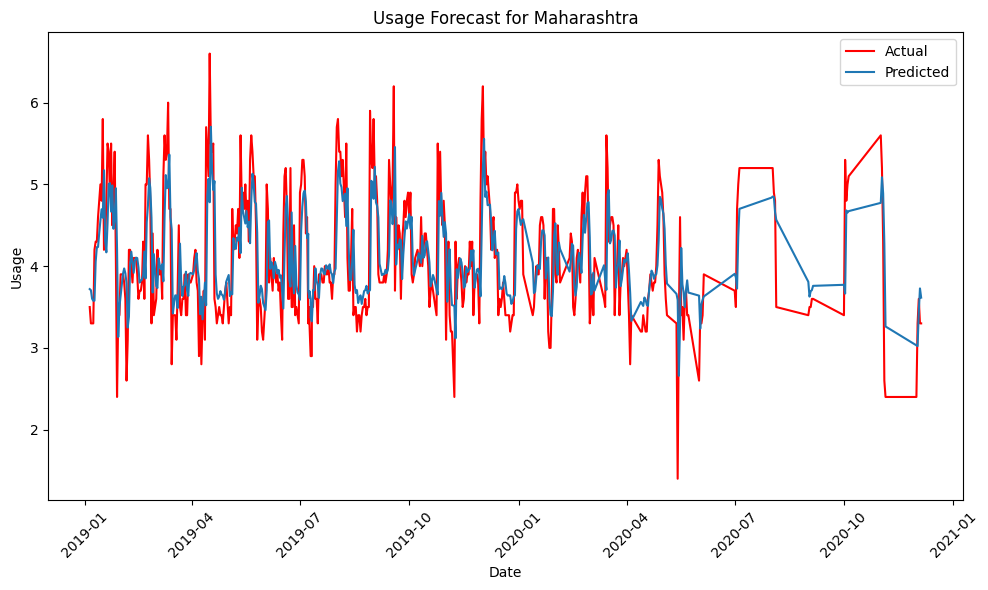

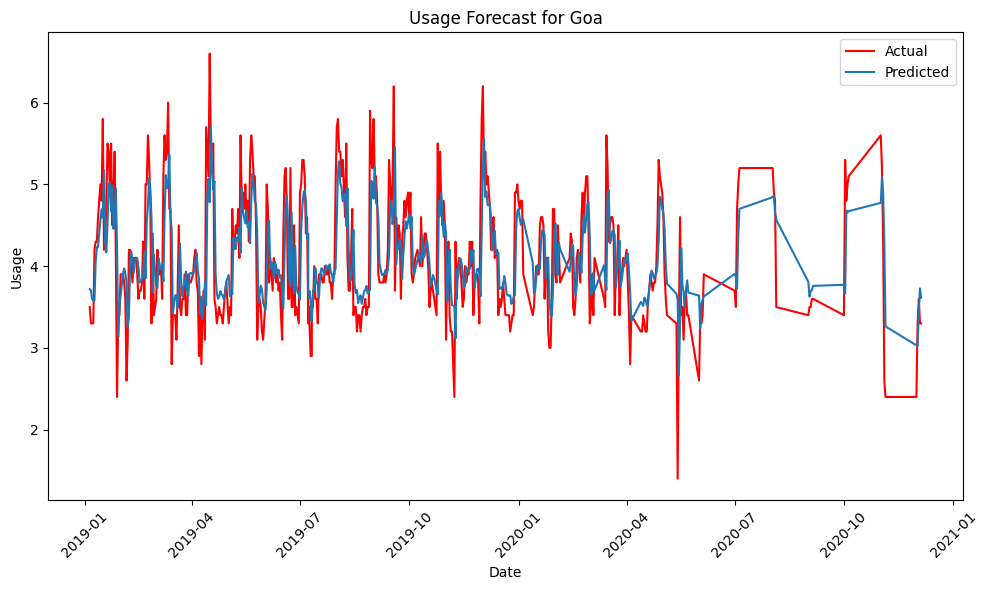

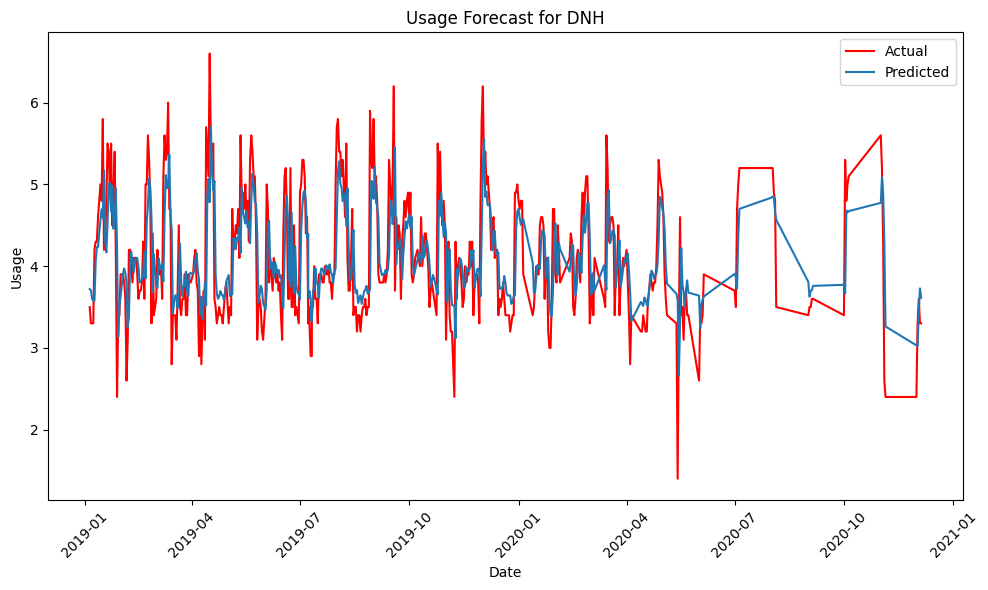

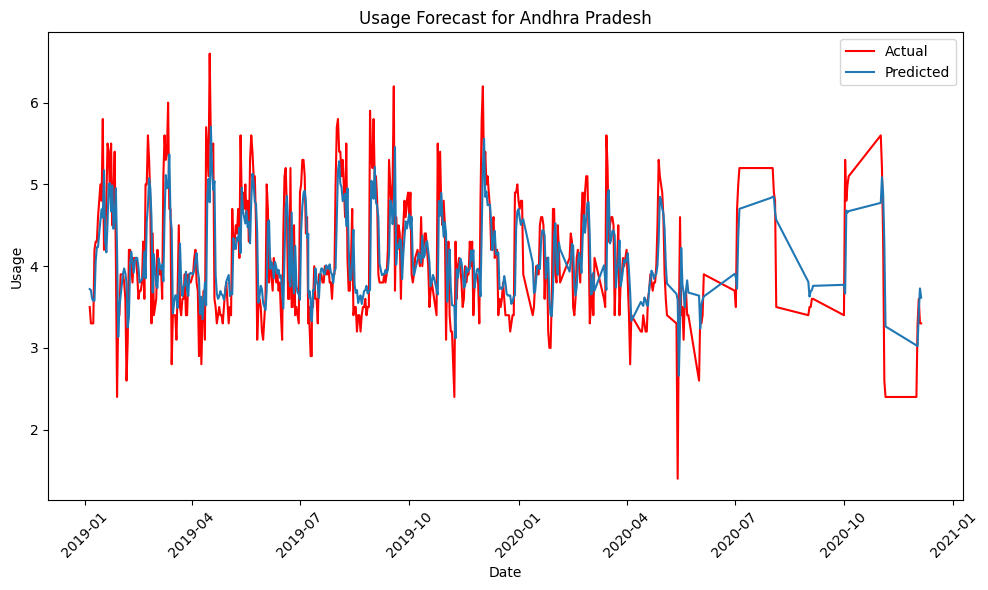

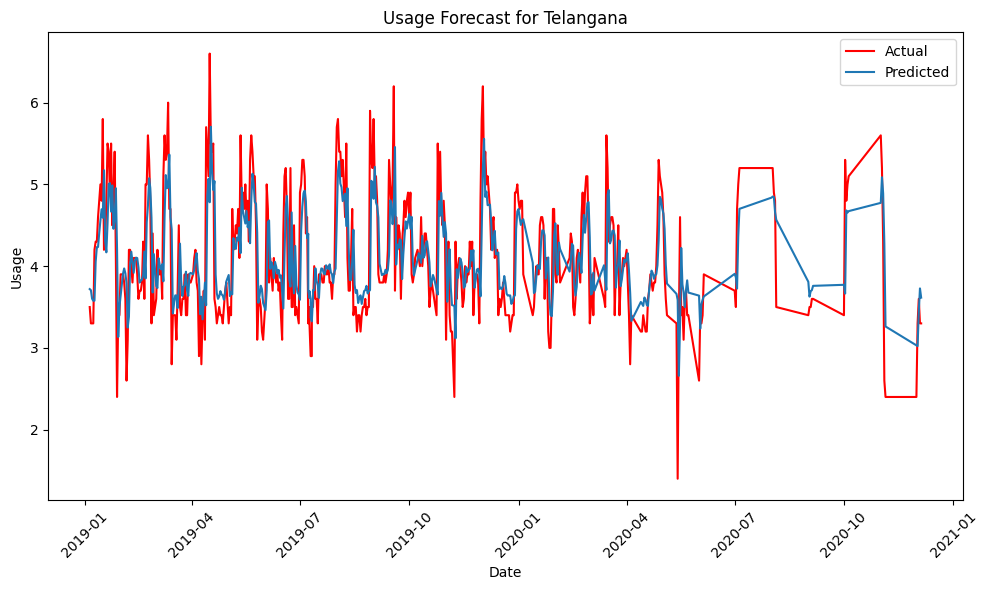

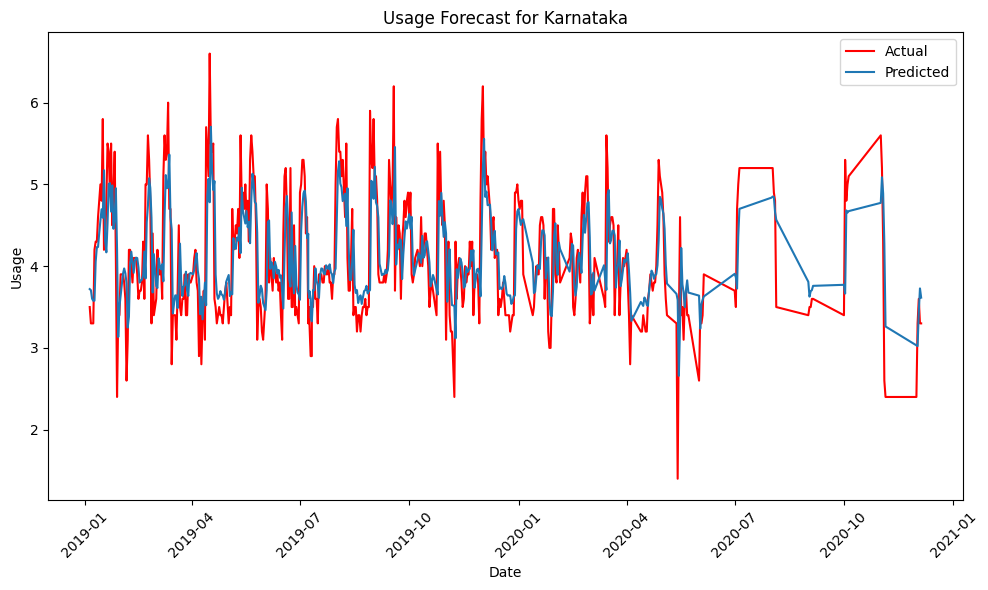

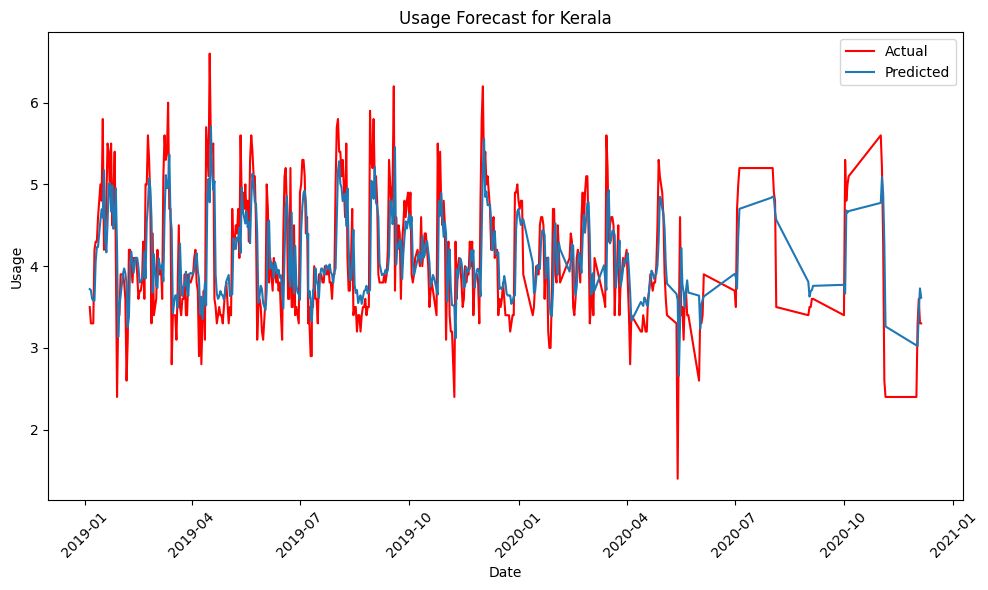

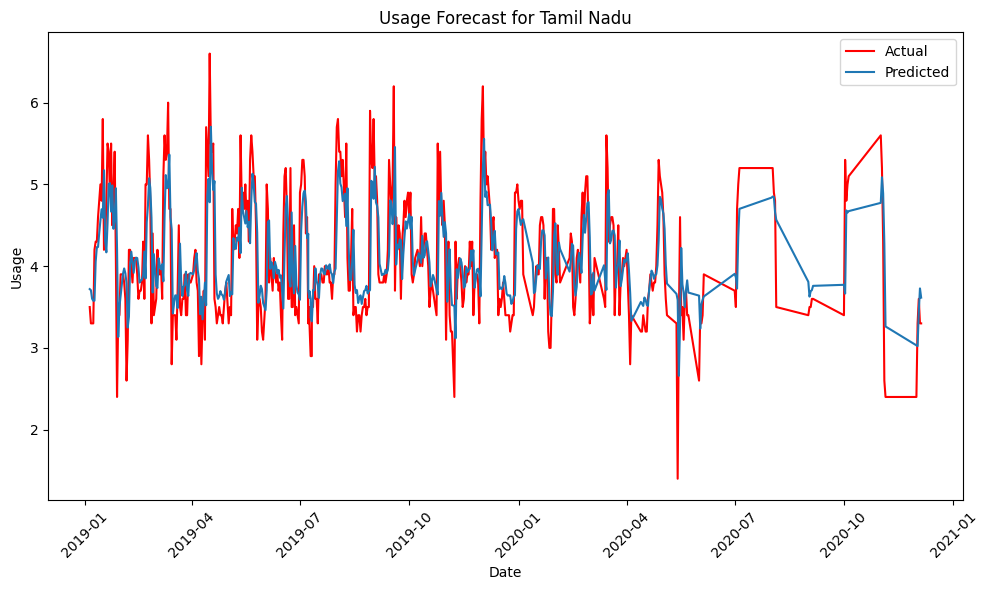

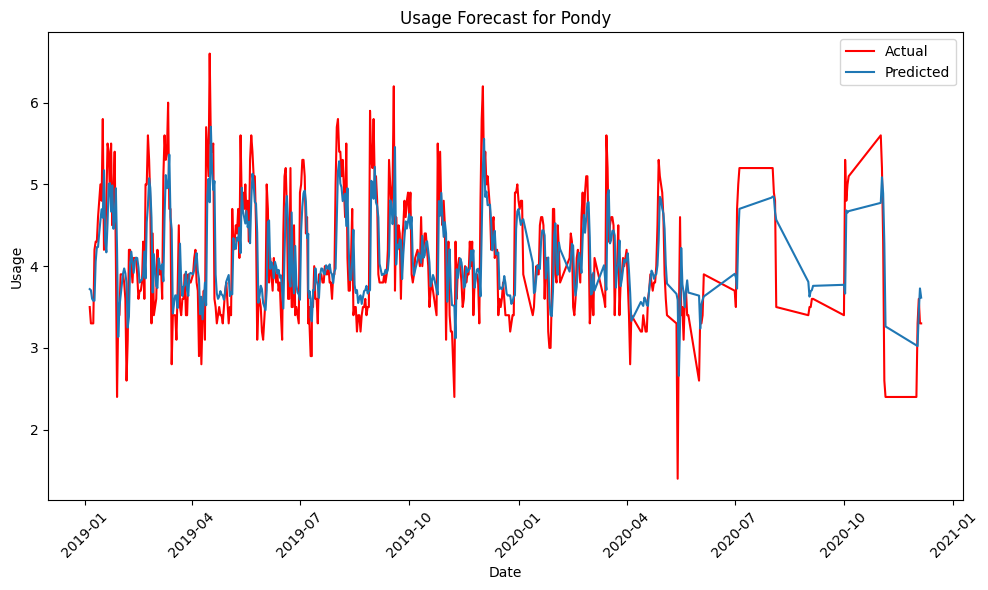

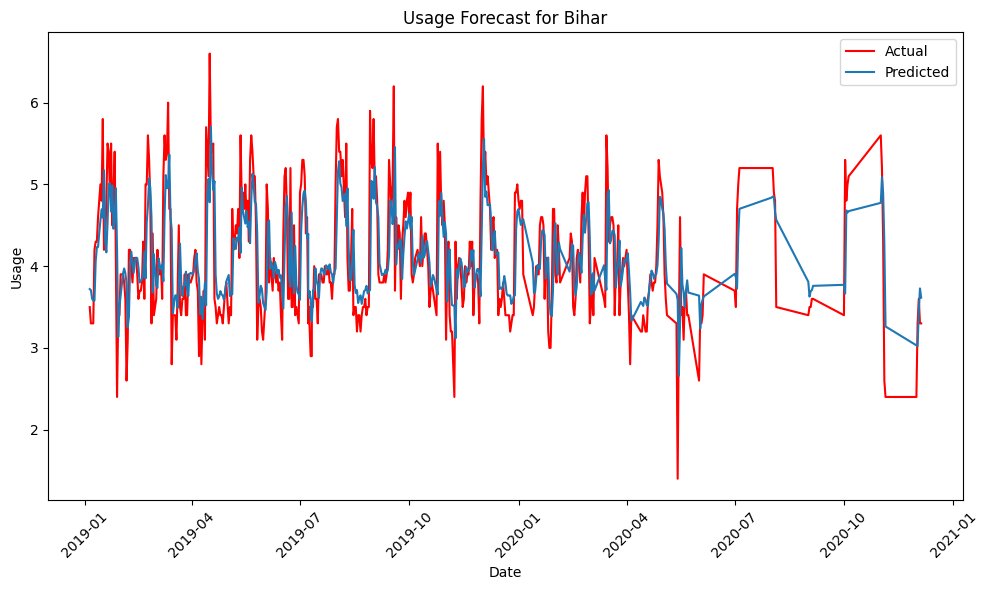

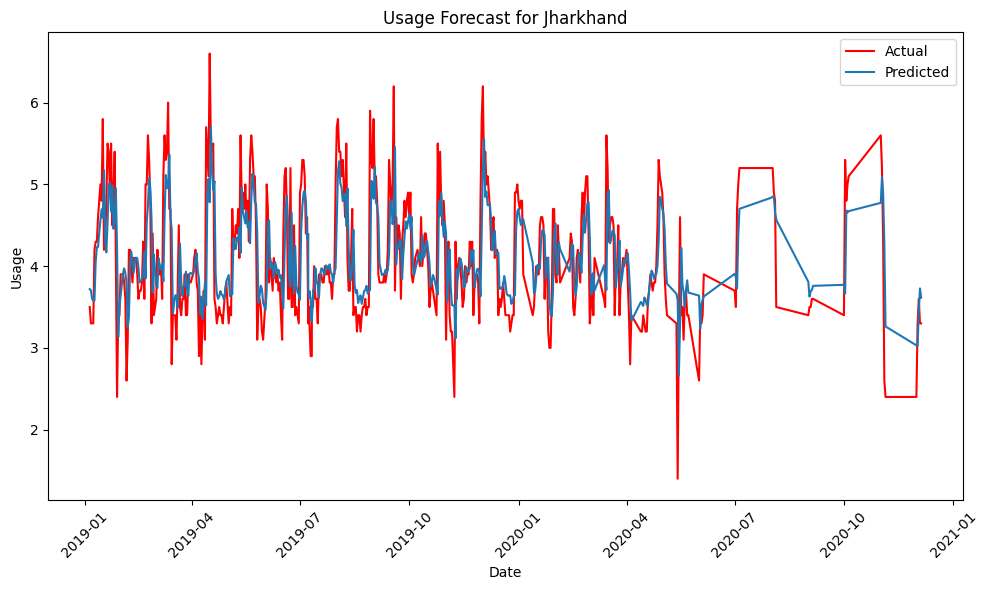

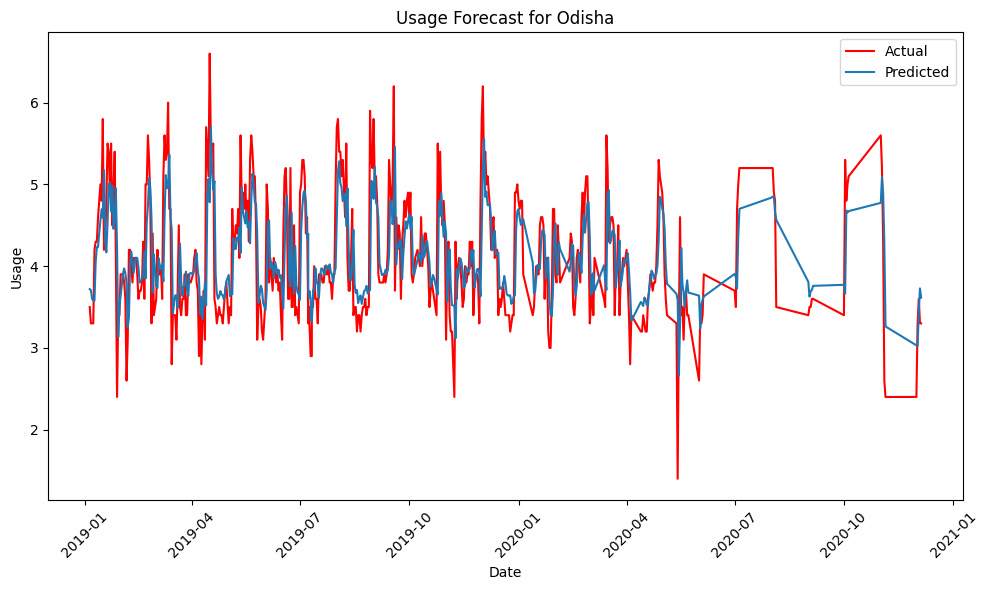

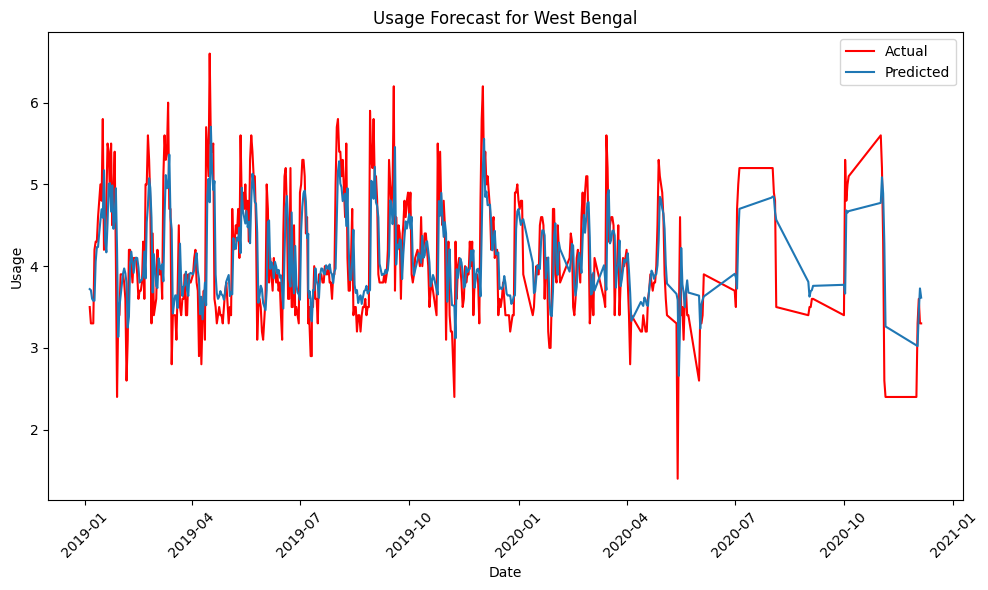

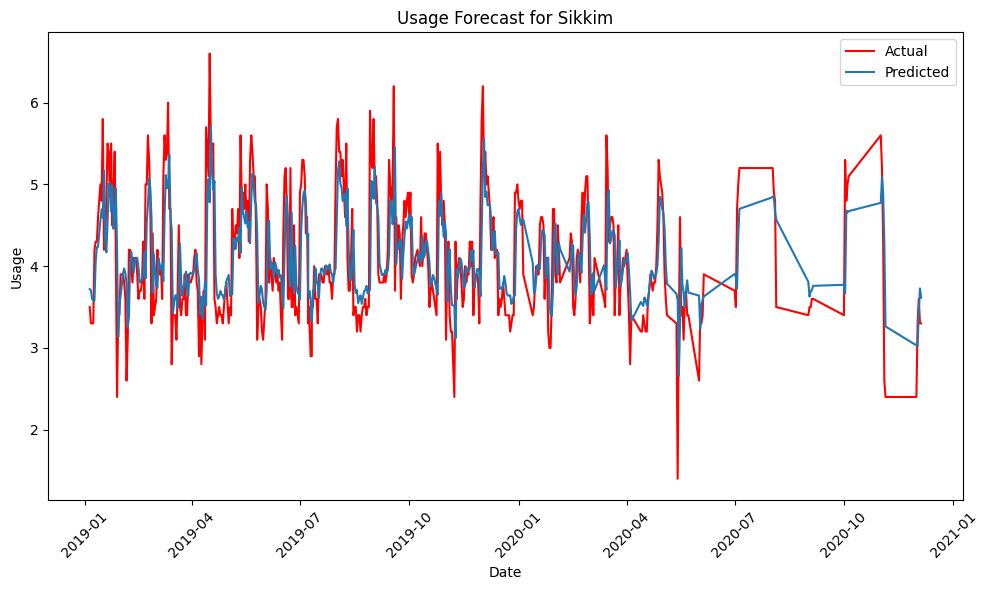

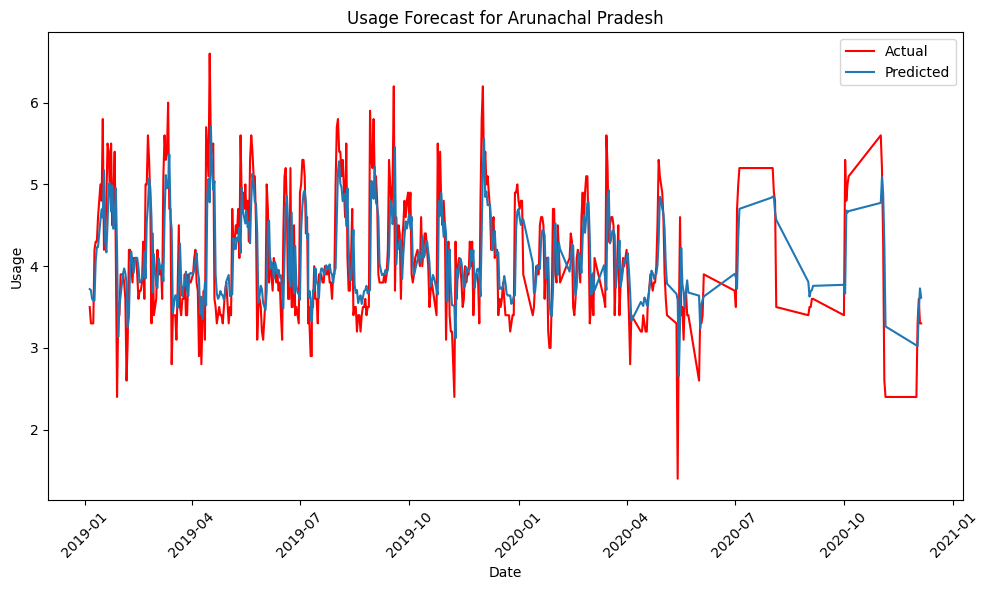

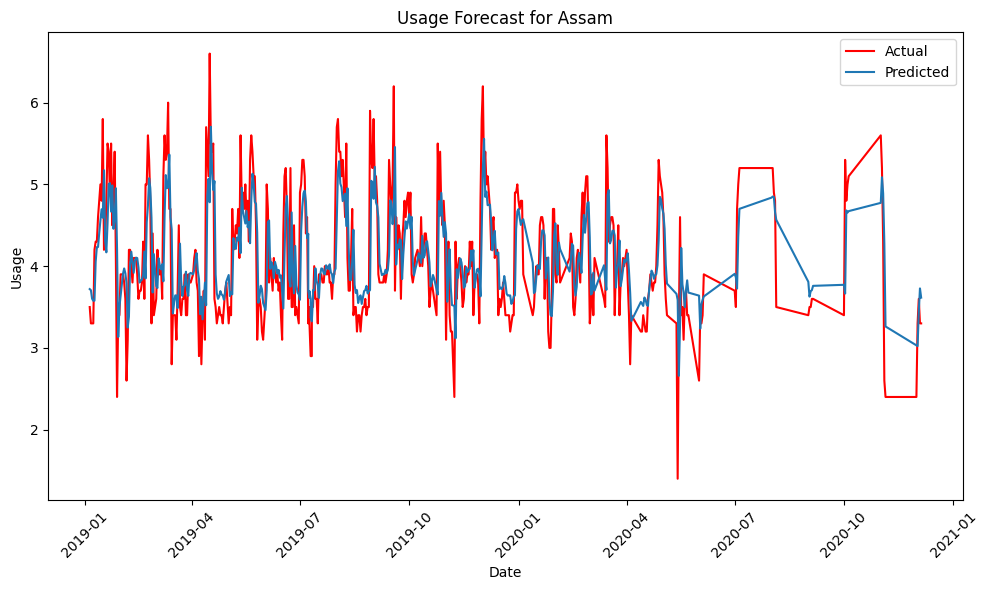

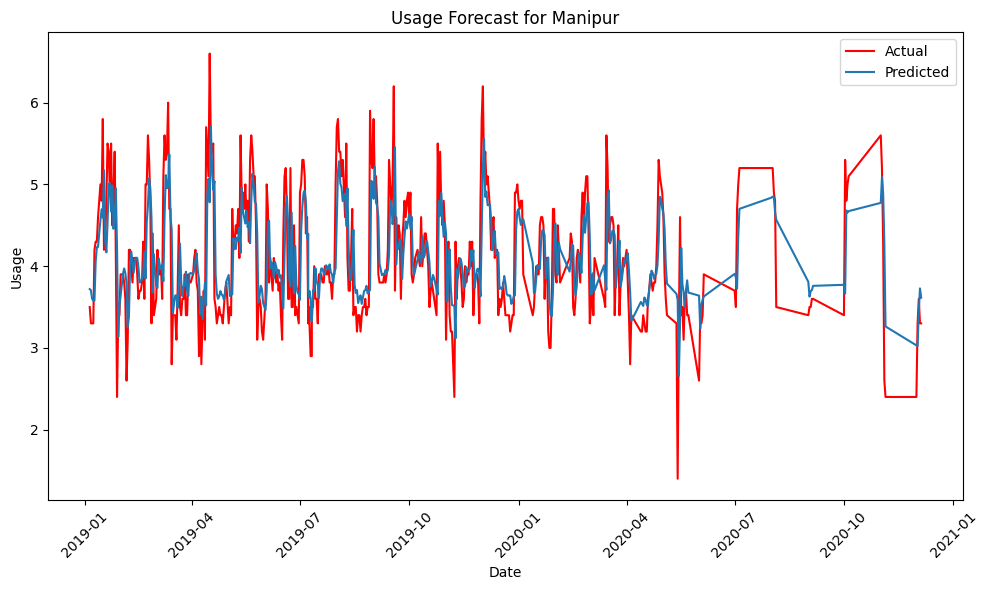

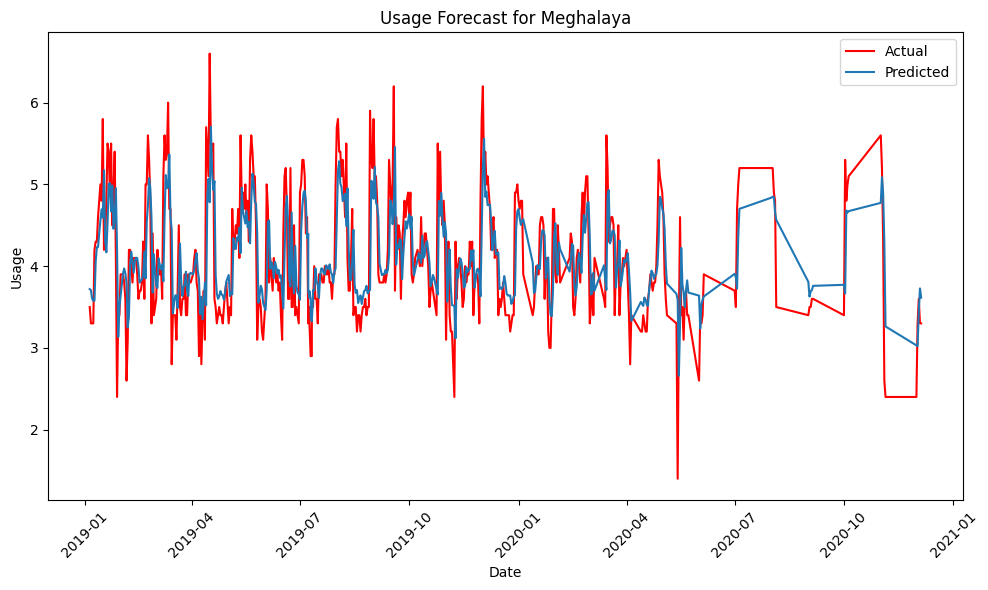

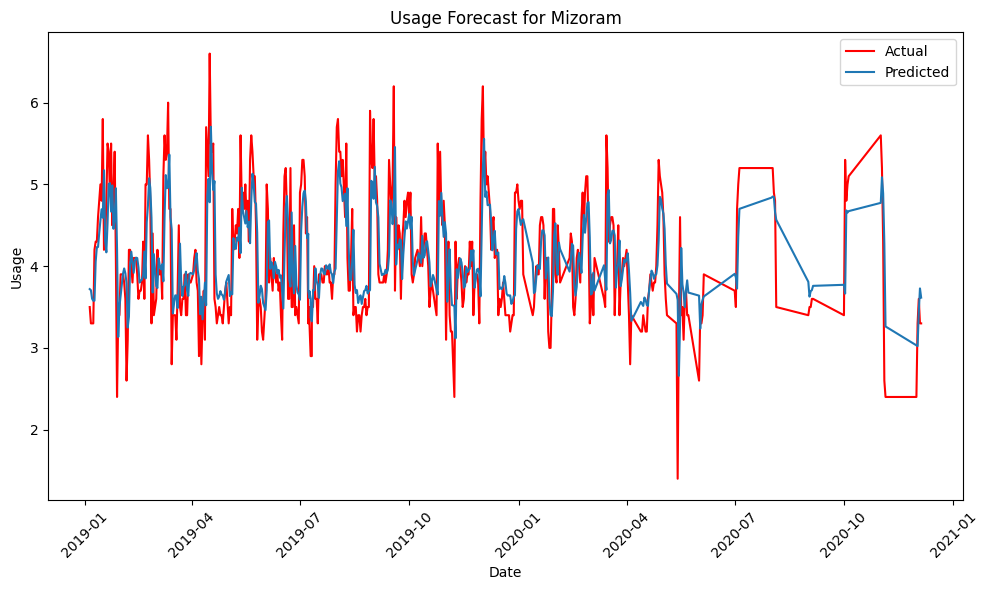

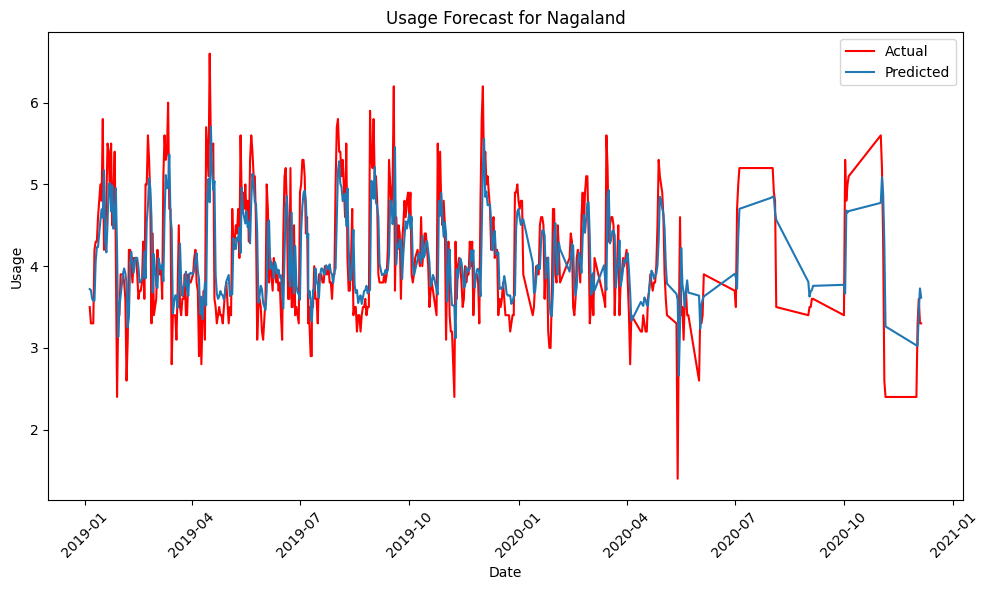

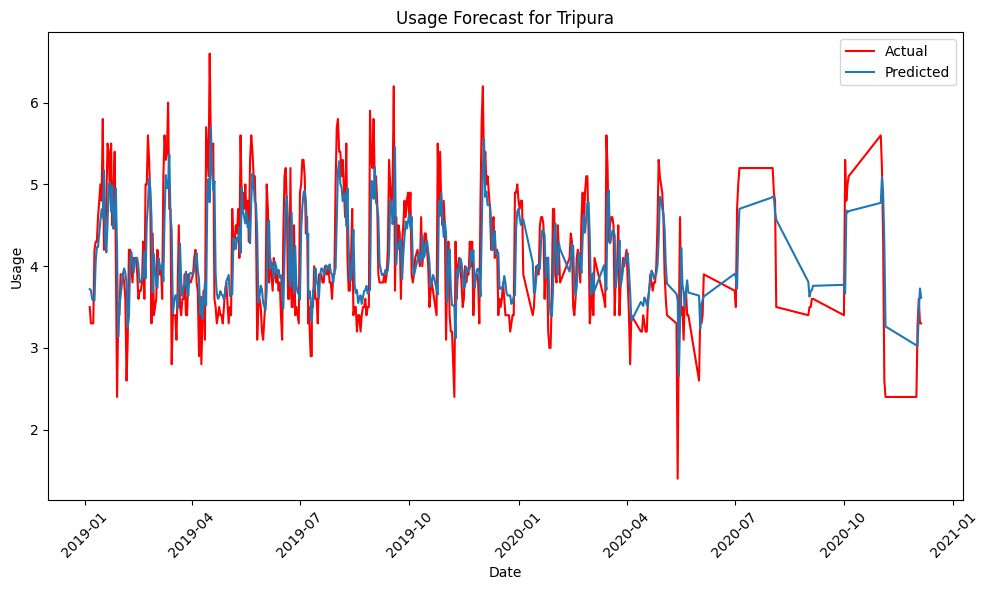

In [ ]:
import matplotlib.pyplot as plt

# Iterate over the LSTM models for each state
for state, lstm_model in state_lstm_forecasts.items():
    # Plot the actual usage data
    plt.figure(figsize=(10, 6))
    plt.plot(state_df['Dates'].iloc[n_steps:], y_test, label='Actual', color='red')

    # Plot the predicted values
    plt.plot(state_df['Dates'].iloc[n_steps:], predictions, label='Predicted')

    # Set plot title and labels
    plt.title(f'Usage Forecast for {state}')
    plt.xlabel('Date')
    plt.ylabel('Usage')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
